In [1]:
#!pip install pandas==0.25

In [2]:
import pandas as pd
pd.__version__

'1.1.5'

In [3]:

# Import modules
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import pandas_profiling as pp
import statsmodels.api as sm
from sklearn.model_selection import KFold,cross_val_score, train_test_split, GridSearchCV, learning_curve, validation_curve, RepeatedKFold
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, ElasticNet, Lasso, Ridge, BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error, make_scorer, accuracy_score, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.decomposition import PCA

from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_regression

# Stats
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

# Figures inline and set visualization style
%matplotlib inline
sns.set()
pd.set_option('display.float_format', lambda x: '%.3f' % x)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files
uploaded = files.upload()
import io

df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train.csv


In [5]:
print(df_train.head(n=4))
df_train.shape

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000

[4 rows x 81 columns]


(1460, 81)

In [6]:
n_train = df_train.shape[0]
print(n_train)

1460


In [7]:
#pp.ProfileReport(df_train)

In [8]:
uploaded = files.upload()
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test.csv


In [9]:
print(df_test.shape)
df_test.head(n=4)

(1459, 80)


Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal

[4 rows x 80 columns]

In [10]:
SalePrice_train = df_train.SalePrice
data = pd.concat([df_train.drop(['SalePrice'], axis=1), df_test])

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df_train.SalePrice.describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


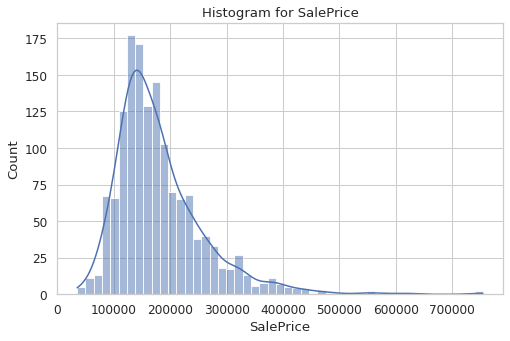

In [13]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(df_train['SalePrice'],kde=True)
plt.title("Histogram for SalePrice")
# Skew and kurt
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Figure 1.1: distribution of the dependent variable sale prices

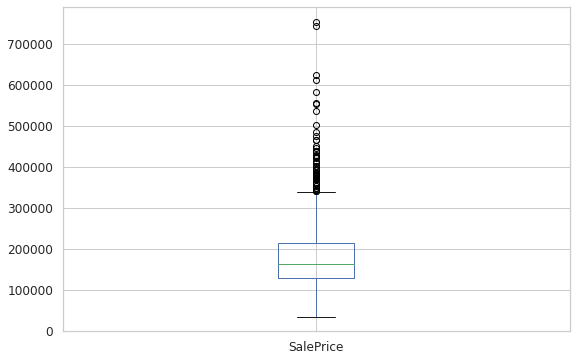

In [14]:
df_train.SalePrice.plot.box()
plt.tight_layout(pad=0.5)

Figure 1.2: box plot of the dependent variable sale prices

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

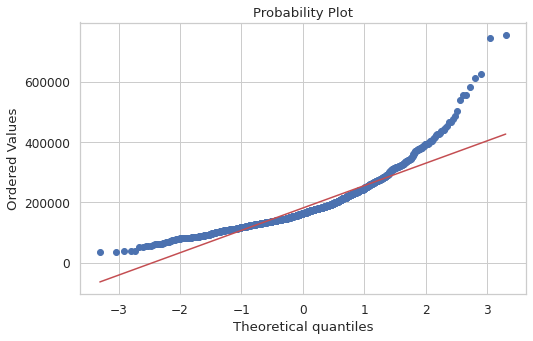

In [15]:
stats.probplot(df_train.SalePrice, plot=sns.mpl.pyplot)

Figure 1.3: Q-Q plot of the dependent variable sale prices

In [16]:
df_train.describe()

Id  MSSubClass  LotFrontage  ...   MoSold   YrSold  SalePrice
count 1460.000    1460.000     1201.000  ... 1460.000 1460.000   1460.000
mean   730.500      56.897       70.050  ...    6.322 2007.816 180921.196
std    421.610      42.301       24.285  ...    2.704    1.328  79442.503
min      1.000      20.000       21.000  ...    1.000 2006.000  34900.000
25%    365.750      20.000       59.000  ...    5.000 2007.000 129975.000
50%    730.500      50.000       69.000  ...    6.000 2008.000 163000.000
75%   1095.250      70.000       80.000  ...    8.000 2009.000 214000.000
max   1460.000     190.000      313.000  ...   12.000 2010.000 755000.000

[8 rows x 38 columns]

In [17]:
data_percent_missing = data.isnull().sum() * 100 / len(data)
data_missing_value = pd.DataFrame({'column_name': data.columns,'percent_missing': data_percent_missing})
data_missing_value = data_missing_value.sort_values('percent_missing',ascending=False)
data_missing_value['dtypes'] = data.dtypes
data_missing_value = data_missing_value[data_missing_value.percent_missing>0]
print(data_missing_value)

               column_name  percent_missing   dtypes
PoolQC              PoolQC           99.657   object
MiscFeature    MiscFeature           96.403   object
Alley                Alley           93.217   object
Fence                Fence           80.439   object
FireplaceQu    FireplaceQu           48.647   object
LotFrontage    LotFrontage           16.650  float64
GarageYrBlt    GarageYrBlt            5.447  float64
GarageFinish  GarageFinish            5.447   object
GarageQual      GarageQual            5.447   object
GarageCond      GarageCond            5.447   object
GarageType      GarageType            5.379   object
BsmtExposure  BsmtExposure            2.809   object
BsmtCond          BsmtCond            2.809   object
BsmtQual          BsmtQual            2.775   object
BsmtFinType2  BsmtFinType2            2.741   object
BsmtFinType1  BsmtFinType1            2.706   object
MasVnrType      MasVnrType            0.822   object
MasVnrArea      MasVnrArea            0.788  f

In [18]:
data_missing_object = data_missing_value[data_missing_value['dtypes']=='object']['column_name'].tolist()
data_missing_num = data_missing_value[data_missing_value['dtypes']!='object']['column_name'].tolist()
print(data_missing_object)
print(data_missing_num)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MSZoning', 'Functional', 'Utilities', 'KitchenQual', 'SaleType', 'Exterior2nd', 'Exterior1st', 'Electrical']
['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']


Figure 4.2: imputation for missing data

In [19]:
for col in data_missing_object:
        data[col] = data[col].fillna('_NA_');
for col in data_missing_num:
        data[col] = data[col].fillna(0);
#for col in ['GarageYrBlt']:
#       data[col] = data.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.median()))

In [20]:
data_percent_missing = data.isnull().sum() * 100 / len(data)
data_missing_value = pd.DataFrame({'column_name': data.columns,'percent_missing': data_percent_missing})
data_missing_value = data_missing_value.sort_values('percent_missing',ascending=False)
data_missing_value['dtypes'] = data.dtypes
data_missing_value[data_missing_value.percent_missing>0]

Empty DataFrame
Columns: [column_name, percent_missing, dtypes]
Index: []

In [21]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  ...  MoSold YrSold SaleType SaleCondition
0   1          60       RL       65.000  ...       2   2008       WD        Normal
1   2          20       RL       80.000  ...       5   2007       WD        Normal
2   3          60       RL       68.000  ...       9   2008       WD        Normal
3   4          70       RL       60.000  ...       2   2006       WD       Abnorml
4   5          60       RL       84.000  ...      12   2008       WD        Normal

[5 rows x 80 columns]

Figure 4.1: feature creation 

In [22]:
data['TotalSF'] = data['1stFlrSF']  + data['2ndFlrSF'] + data['TotalBsmtSF']
data['TotalPorchSF'] = data['OpenPorchSF']+data['EnclosedPorch']+data['3SsnPorch']+data['ScreenPorch']+data['WoodDeckSF']
data['HouseAge'] = data.YrSold - data.YearBuilt
data['QualityIndex'] = data.OverallQual * data.OverallCond
data['Total_Bathrooms'] = data.BsmtFullBath + .5*data.BsmtHalfBath + data.FullBath + .5*data.HalfBath
data['Has_Fireplaces'] = np.where(data['Fireplaces']>=1, 1, 0)
data['Has_Bsmt'] = np.where(data['TotalBsmtSF']>=0, 1, 0)
data['Has_Garage'] = np.where(data['GarageArea']>=0, 1, 0)
data['Has_Pool'] = np.where(data['PoolArea']>=0, 1, 0)
data['Has_2ndStory'] = np.where(data['2ndFlrSF']>=0, 1, 0)
data.head()

Id  MSSubClass MSZoning  ...  Has_Garage  Has_Pool Has_2ndStory
0   1          60       RL  ...           1         1            1
1   2          20       RL  ...           1         1            1
2   3          60       RL  ...           1         1            1
3   4          70       RL  ...           1         1            1
4   5          60       RL  ...           1         1            1

[5 rows x 90 columns]

Figure 2.1: list of columns of the percentage of missing values

(1460, 37)


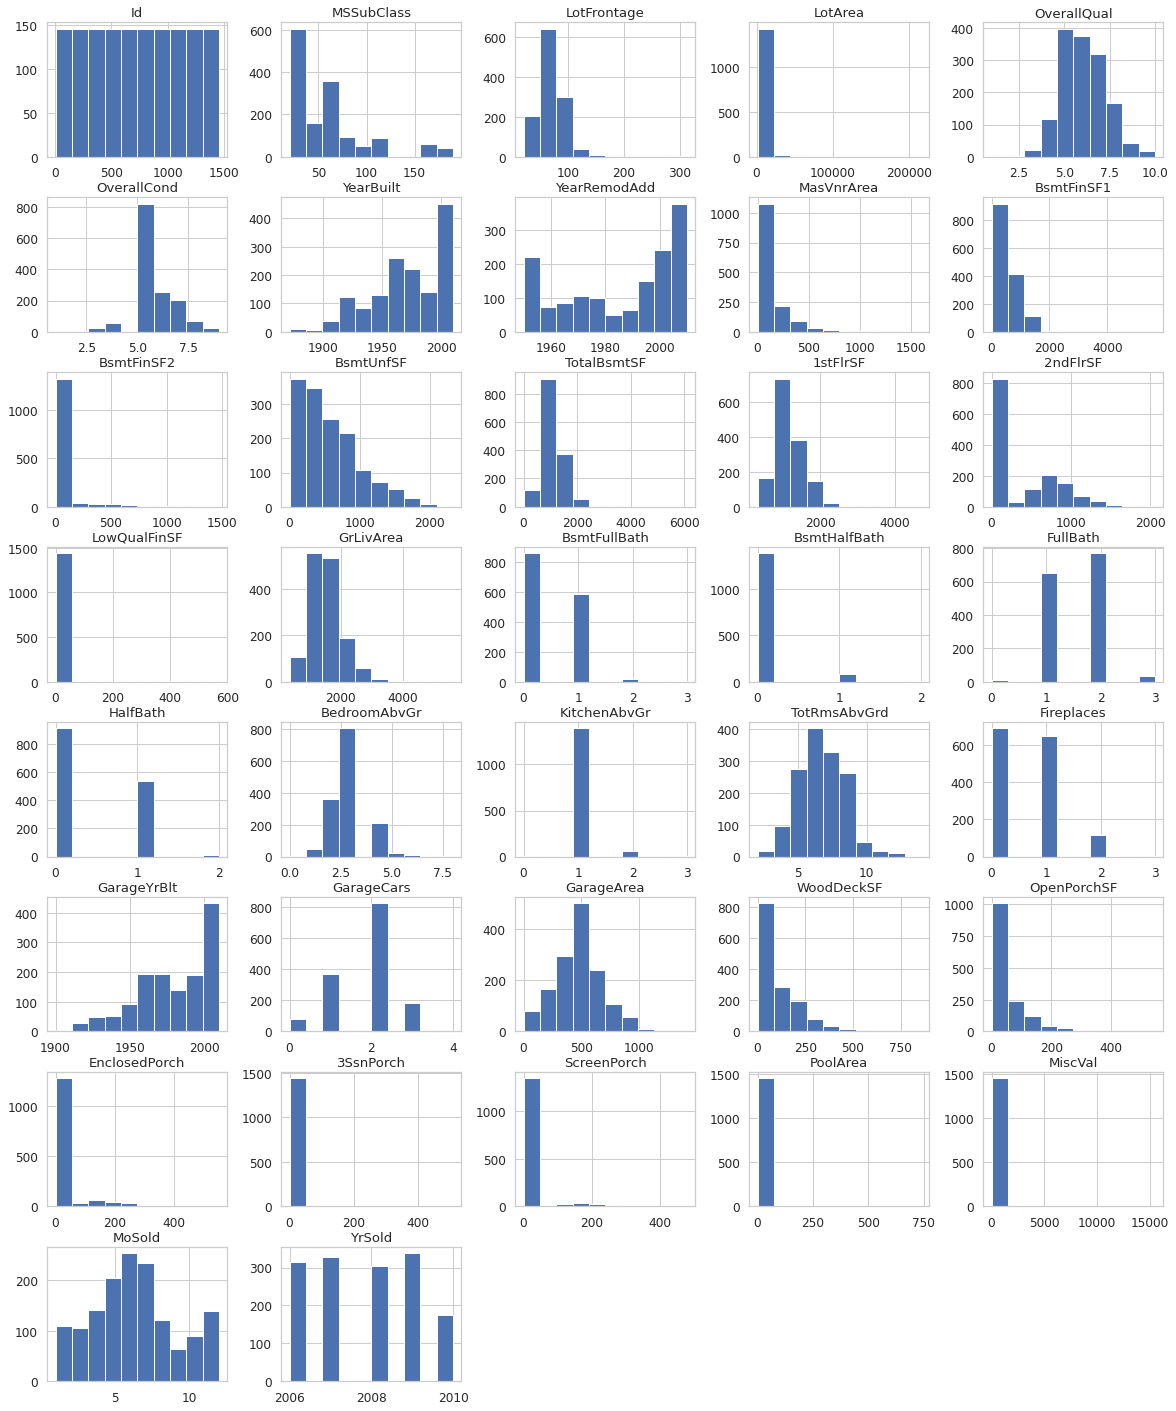

In [23]:
df_train_num =  df_train.select_dtypes(include=np.number)
df_train_num_predictors = df_train_num.drop(['SalePrice'], axis=1)
print(df_train_num_predictors.shape)
df_train_num_predictors.hist(bins=10, figsize=(20, 25), layout=(8, 5));

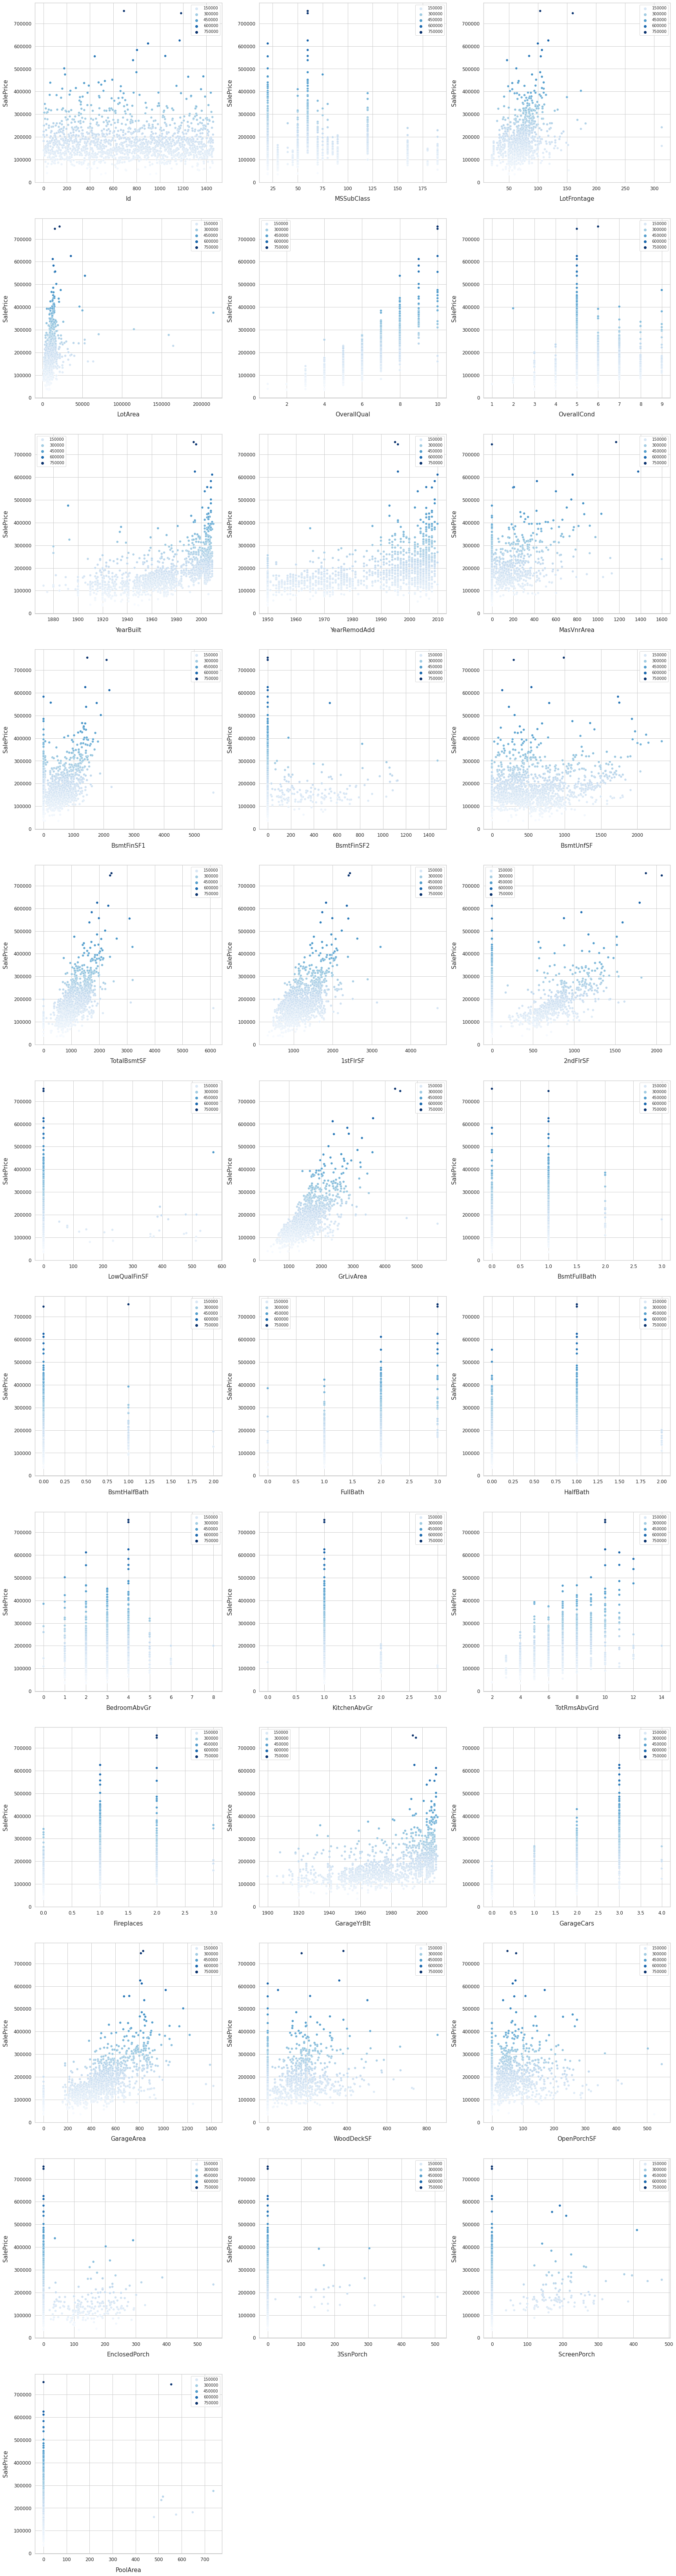

In [24]:
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 150))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(df_train_num_predictors), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(df_train_num_predictors)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=df_train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

Figure 3.1: scatter plots of continuous variables versus the sale price

In [25]:
# Outliers
print(df_train[(df_train.GrLivArea>4500) & (df_train.SalePrice<200000)])
print(df_train[(df_train['1stFlrSF']>4500) & (df_train.SalePrice<200000)])
print(df_train[(df_train.LotFrontage>300)])

        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
523    524          60       RL  ...       New        Partial    184750
1298  1299          60       RL  ...       New        Partial    160000

[2 rows x 81 columns]
        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
1298  1299          60       RL  ...       New        Partial    160000

[1 rows x 81 columns]
        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
934    935          20       RL  ...        WD         Normal    242000
1298  1299          60       RL  ...       New        Partial    160000

[2 rows x 81 columns]


Figure 2.2: list of outliers

Categorical: (1460, 43)
Numerical: (1460, 37)


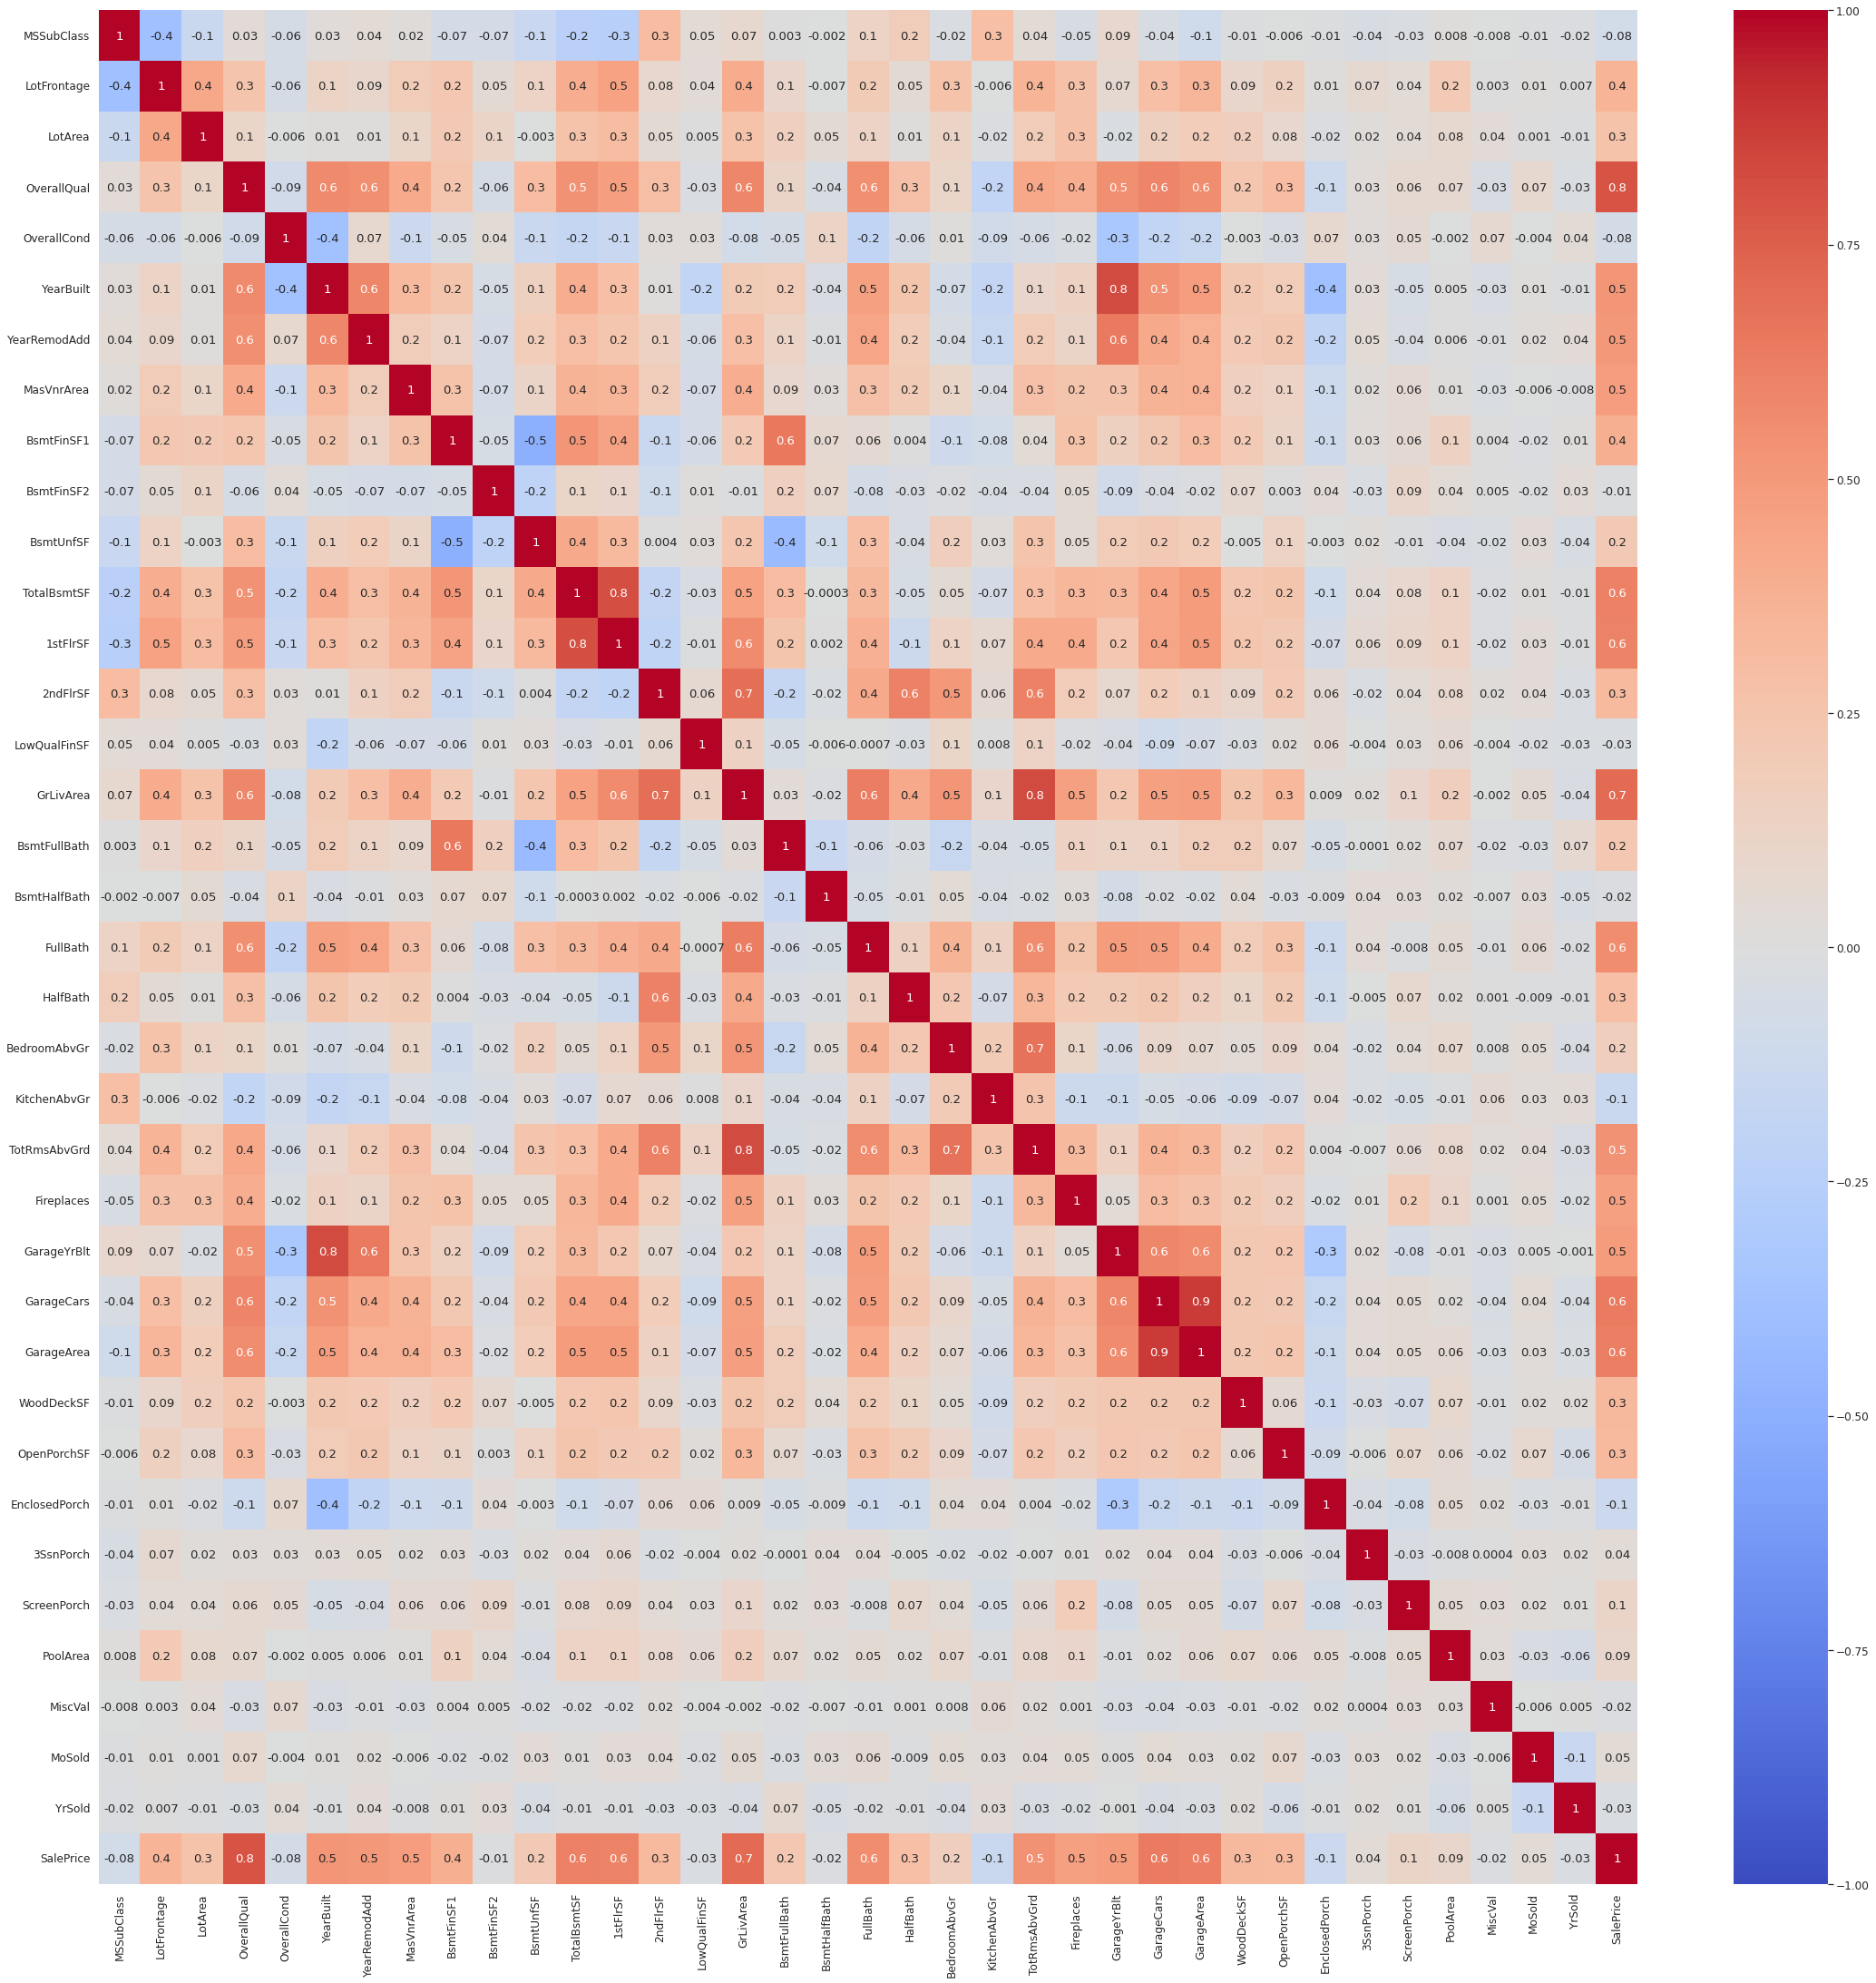

In [26]:
df_train_categorical =  df_train.select_dtypes(exclude=np.number)
print("Categorical:", df_train_categorical.shape)
df_train_num =  df_train.select_dtypes(include=np.number)
df_train_num = df_train_num.drop(['Id'], axis=1)
print("Numerical:", df_train_num.shape)
plt.subplots(figsize=(38, 38))
sns.heatmap(df_train_num.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1g')

Figure 3.2: correlation matrix

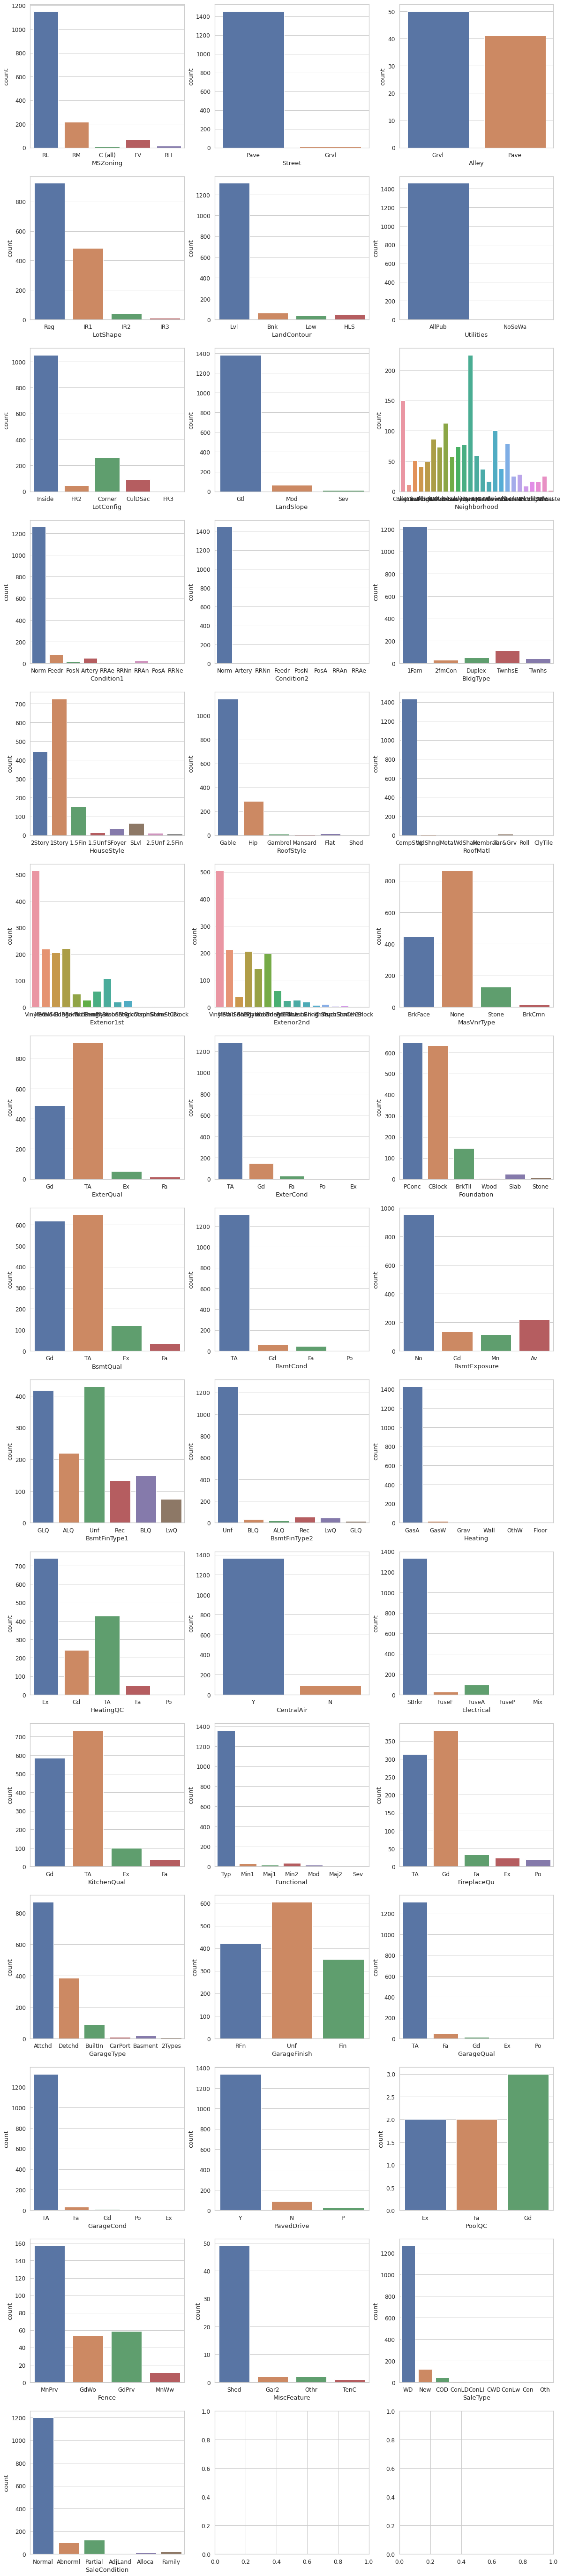

In [27]:
# visualising some more outliers in the data values
fig, ax = plt.subplots(15, 3, figsize=(20, 100))
for var, subplot in zip(df_train_categorical, ax.flatten()):
    sns.countplot(x=var, data=df_train, ax=subplot)

Figure 3.3: bar plot of categorical variables 

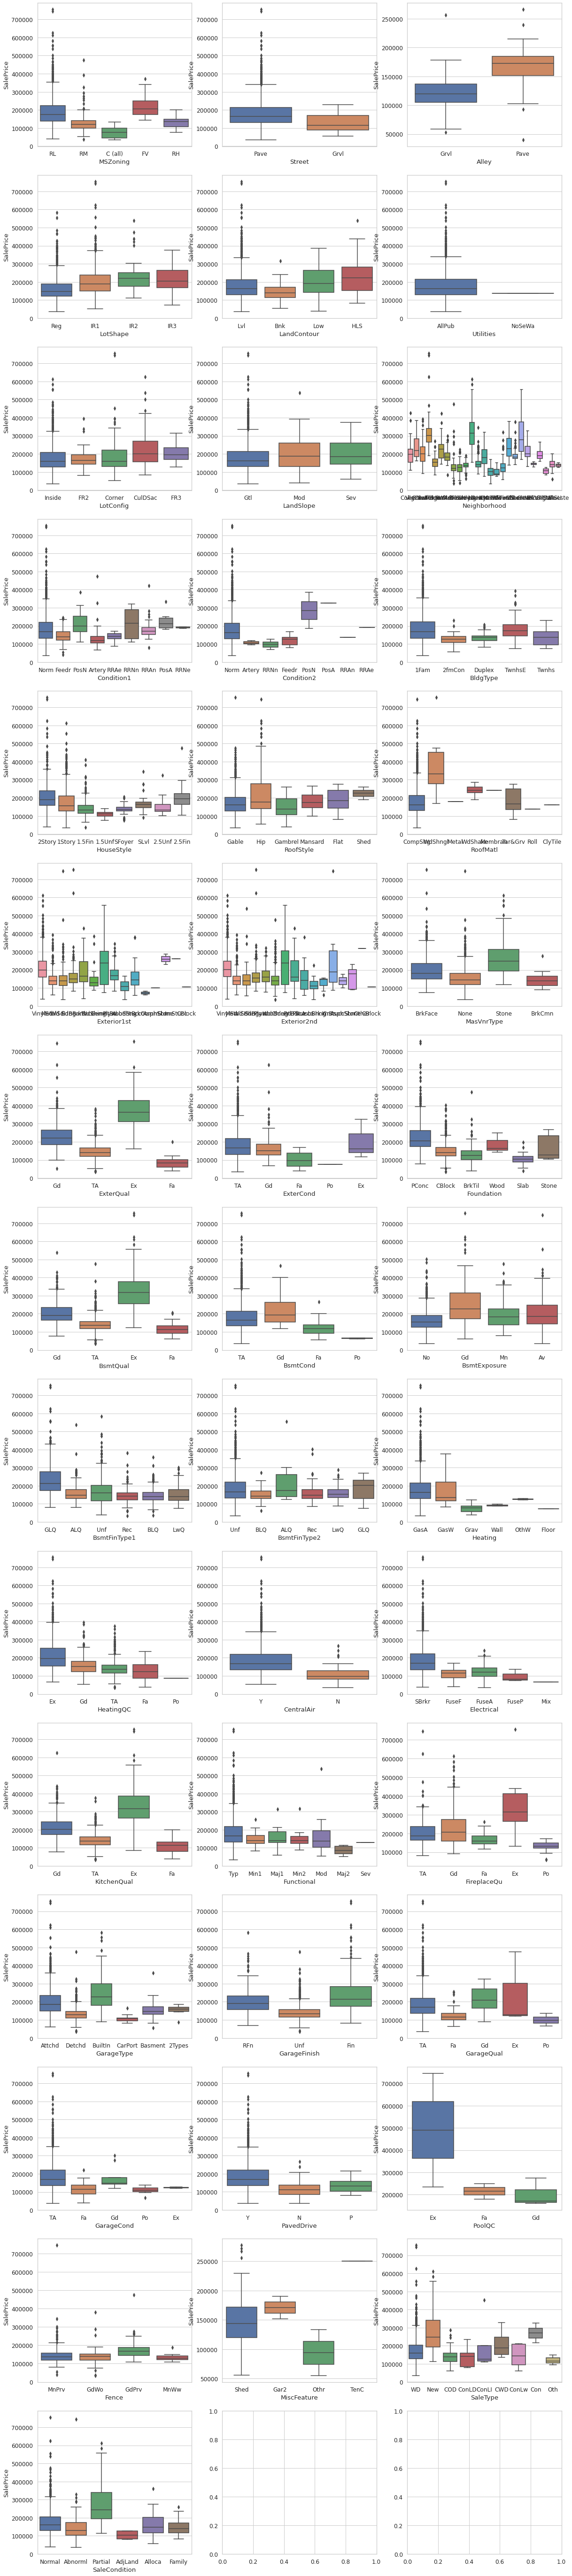

In [28]:
fig, ax = plt.subplots(15, 3, figsize=(20, 100))
for var, subplot in zip(df_train_categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=df_train, ax=subplot)

Figure 3.4: box plot of categorical variables 

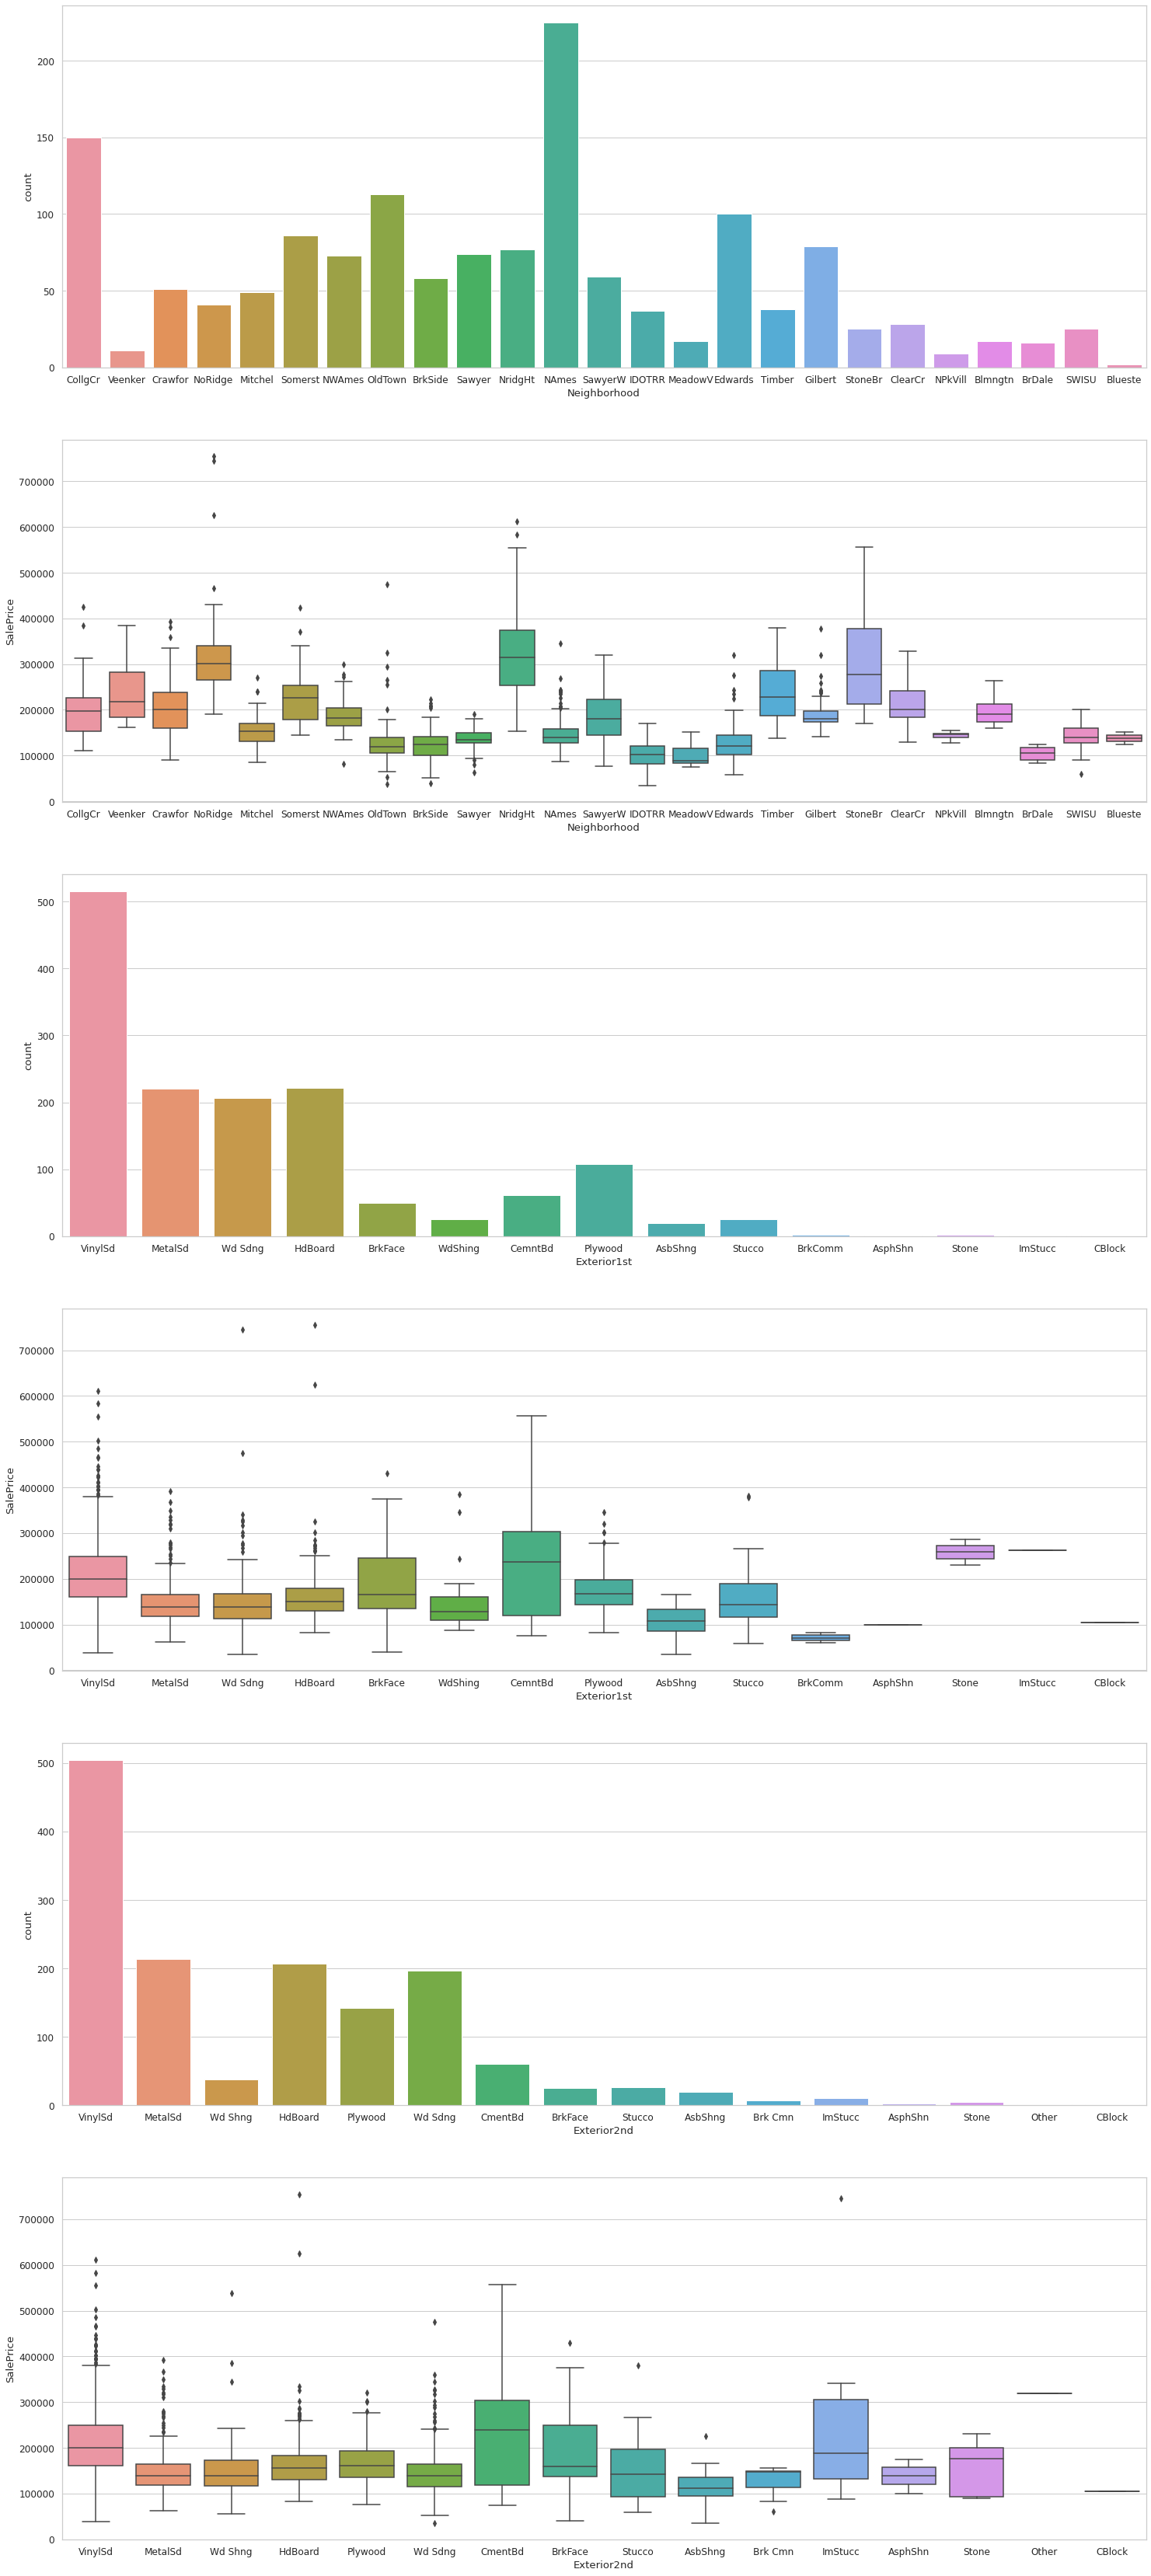

In [29]:
fig = plt.figure(figsize = (25,60))
sns.countplot(x='Neighborhood', data=df_train, ax=fig.add_subplot(6,1,1));
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train, ax=fig.add_subplot(6,1,2));

sns.countplot(x='Exterior1st', data=df_train, ax=fig.add_subplot(6,1,3));
sns.boxplot(x='Exterior1st', y='SalePrice', data=df_train, ax=fig.add_subplot(6,1,4));

sns.countplot(x='Exterior2nd', data=df_train, ax=fig.add_subplot(6,1,5));
sns.boxplot(x='Exterior2nd', y='SalePrice', data=df_train, ax=fig.add_subplot(6,1,6));

In [30]:
print(list(data.columns))

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

Figure 4.3: encode categorical variables

In [31]:
#data = pd.get_dummies(data, columns=list(df_train_categorical.columns), drop_first=True)
data.head()

Id  MSSubClass MSZoning  ...  Has_Garage  Has_Pool Has_2ndStory
0   1          60       RL  ...           1         1            1
1   2          20       RL  ...           1         1            1
2   3          60       RL  ...           1         1            1
3   4          70       RL  ...           1         1            1
4   5          60       RL  ...           1         1            1

[5 rows x 90 columns]

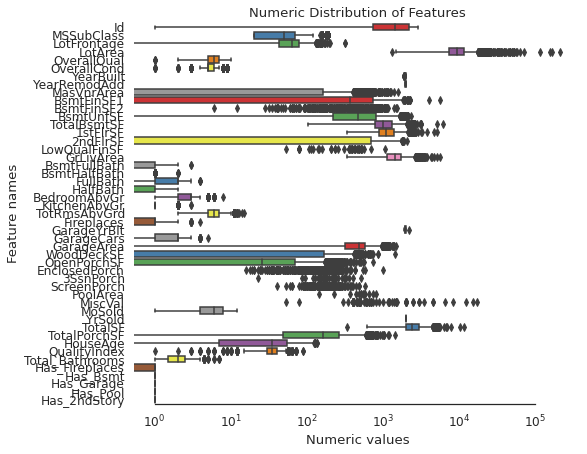

In [32]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in data.columns:
    if data[i].dtype in numeric_dtypes:
        numeric.append(i)

# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=data[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [33]:
# Find skewed numerical features
skew_features = data[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 28 numerical features with Skew > 0.5 :


MiscVal         21.947
PoolArea        16.898
LotArea         12.822
LowQualFinSF    12.089
3SsnPorch       11.376
KitchenAbvGr     4.302
BsmtFinSF2       4.146
EnclosedPorch    4.004
ScreenPorch      3.947
BsmtHalfBath     3.932
dtype: float64

Figure 6.5: Box Cox to skewed features

In [34]:
# Normalize skewed features
for i in skew_index:
  print(i)
  data[i] = data[i]+1
  data[i] = boxcox1p(data[i], boxcox_normmax(data[i]+1))


MiscVal
PoolArea
LotArea
LowQualFinSF
3SsnPorch
KitchenAbvGr
BsmtFinSF2
EnclosedPorch
ScreenPorch
BsmtHalfBath
MasVnrArea
OpenPorchSF
WoodDeckSF
TotalSF
1stFlrSF
BsmtFinSF1
TotalPorchSF
MSSubClass
GrLivArea
TotalBsmtSF
BsmtUnfSF
2ndFlrSF
TotRmsAbvGrd
Fireplaces
HalfBath
BsmtFullBath
HouseAge
OverallCond


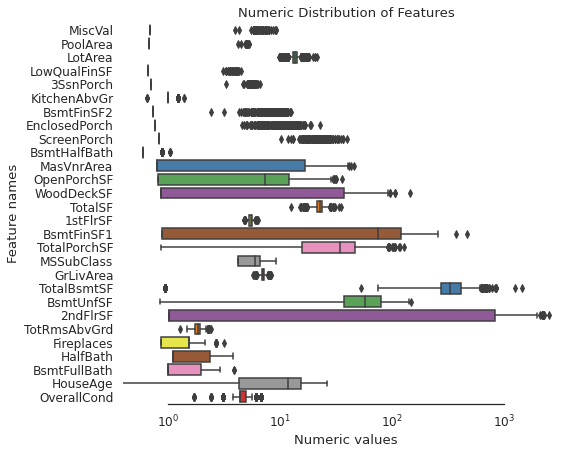

In [35]:
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=data[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [36]:
def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF','HouseAge']

data = logs(data, log_features)

Figure 6.6: Log transformation

In [37]:
def squares(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
        res.columns.values[m] = l + '_sq'
        m += 1
    return res 

squared_features = ['YearRemodAdd', 'LotFrontage_log', 
              'TotalBsmtSF_log', '1stFlrSF_log', '2ndFlrSF_log', 'GrLivArea_log',
              'GarageCars_log', 'GarageArea_log','TotalSF_log','HouseAge_log']
data = squares(data, squared_features)

Figure 6.7: Square of Log transformation

In [38]:
data= pd.get_dummies(data).reset_index(drop=True)
print(data.shape)
data = data.loc[:,~data.columns.duplicated()]
print(data.shape)

(2919, 363)
(2919, 363)


Figure 6.8: Converts categorical data into dummy or indicator variables

In [39]:
df_train = data.iloc[:n_train]
df_test = data.iloc[n_train:]
print(df_train.shape)
print(df_test.shape)
df_train['SalePrice'] = SalePrice_train
df_train = df_train[~df_train.Id.isin([1299,524,935])]
print(df_train.shape)
df_train.head()


(1460, 363)
(1459, 363)
(1457, 364)


Id  MSSubClass  ...  SaleCondition_Partial  SalePrice
0   1       6.329  ...                      0     208500
1   2       4.237  ...                      0     181500
2   3       6.329  ...                      0     223500
3   4       6.667  ...                      0     140000
4   5       6.329  ...                      0     250000

[5 rows x 364 columns]

Figure 5.1: perform both min-max and standard scaling on the dependent variable

In [40]:
# log(1+x) transform
df_train["Log1p_SalePrice"] = np.log1p(df_train['SalePrice'] )

# define standard scaler
scaler = StandardScaler()
df_train["StandardScal_SalePrice"] = scaler.fit_transform(df_train[['SalePrice']] )

# define max-min scaler
scaler = MinMaxScaler()
df_train["MaxMinScal_SalePrice"] = scaler.fit_transform(df_train[['SalePrice']] )
df_train.head()

Id  MSSubClass  ...  StandardScal_SalePrice  MaxMinScal_SalePrice
0   1       6.329  ...                   0.347                 0.241
1   2       4.237  ...                   0.008                 0.204
2   3       6.329  ...                   0.536                 0.262
3   4       6.667  ...                  -0.514                 0.146
4   5       6.329  ...                   0.870                 0.299

[5 rows x 367 columns]

In [41]:
df_train.dtypes

Id                          int64
MSSubClass                float64
LotFrontage               float64
LotArea                   float64
OverallQual                 int64
OverallCond               float64
YearBuilt                   int64
YearRemodAdd                int64
MasVnrArea                float64
BsmtFinSF1                float64
BsmtFinSF2                float64
BsmtUnfSF                 float64
TotalBsmtSF               float64
1stFlrSF                  float64
2ndFlrSF                  float64
LowQualFinSF              float64
GrLivArea                 float64
BsmtFullBath              float64
BsmtHalfBath              float64
FullBath                    int64
HalfBath                  float64
BedroomAbvGr                int64
KitchenAbvGr              float64
TotRmsAbvGrd              float64
Fireplaces                float64
GarageYrBlt               float64
GarageCars                float64
GarageArea                float64
WoodDeckSF                float64
OpenPorchSF   

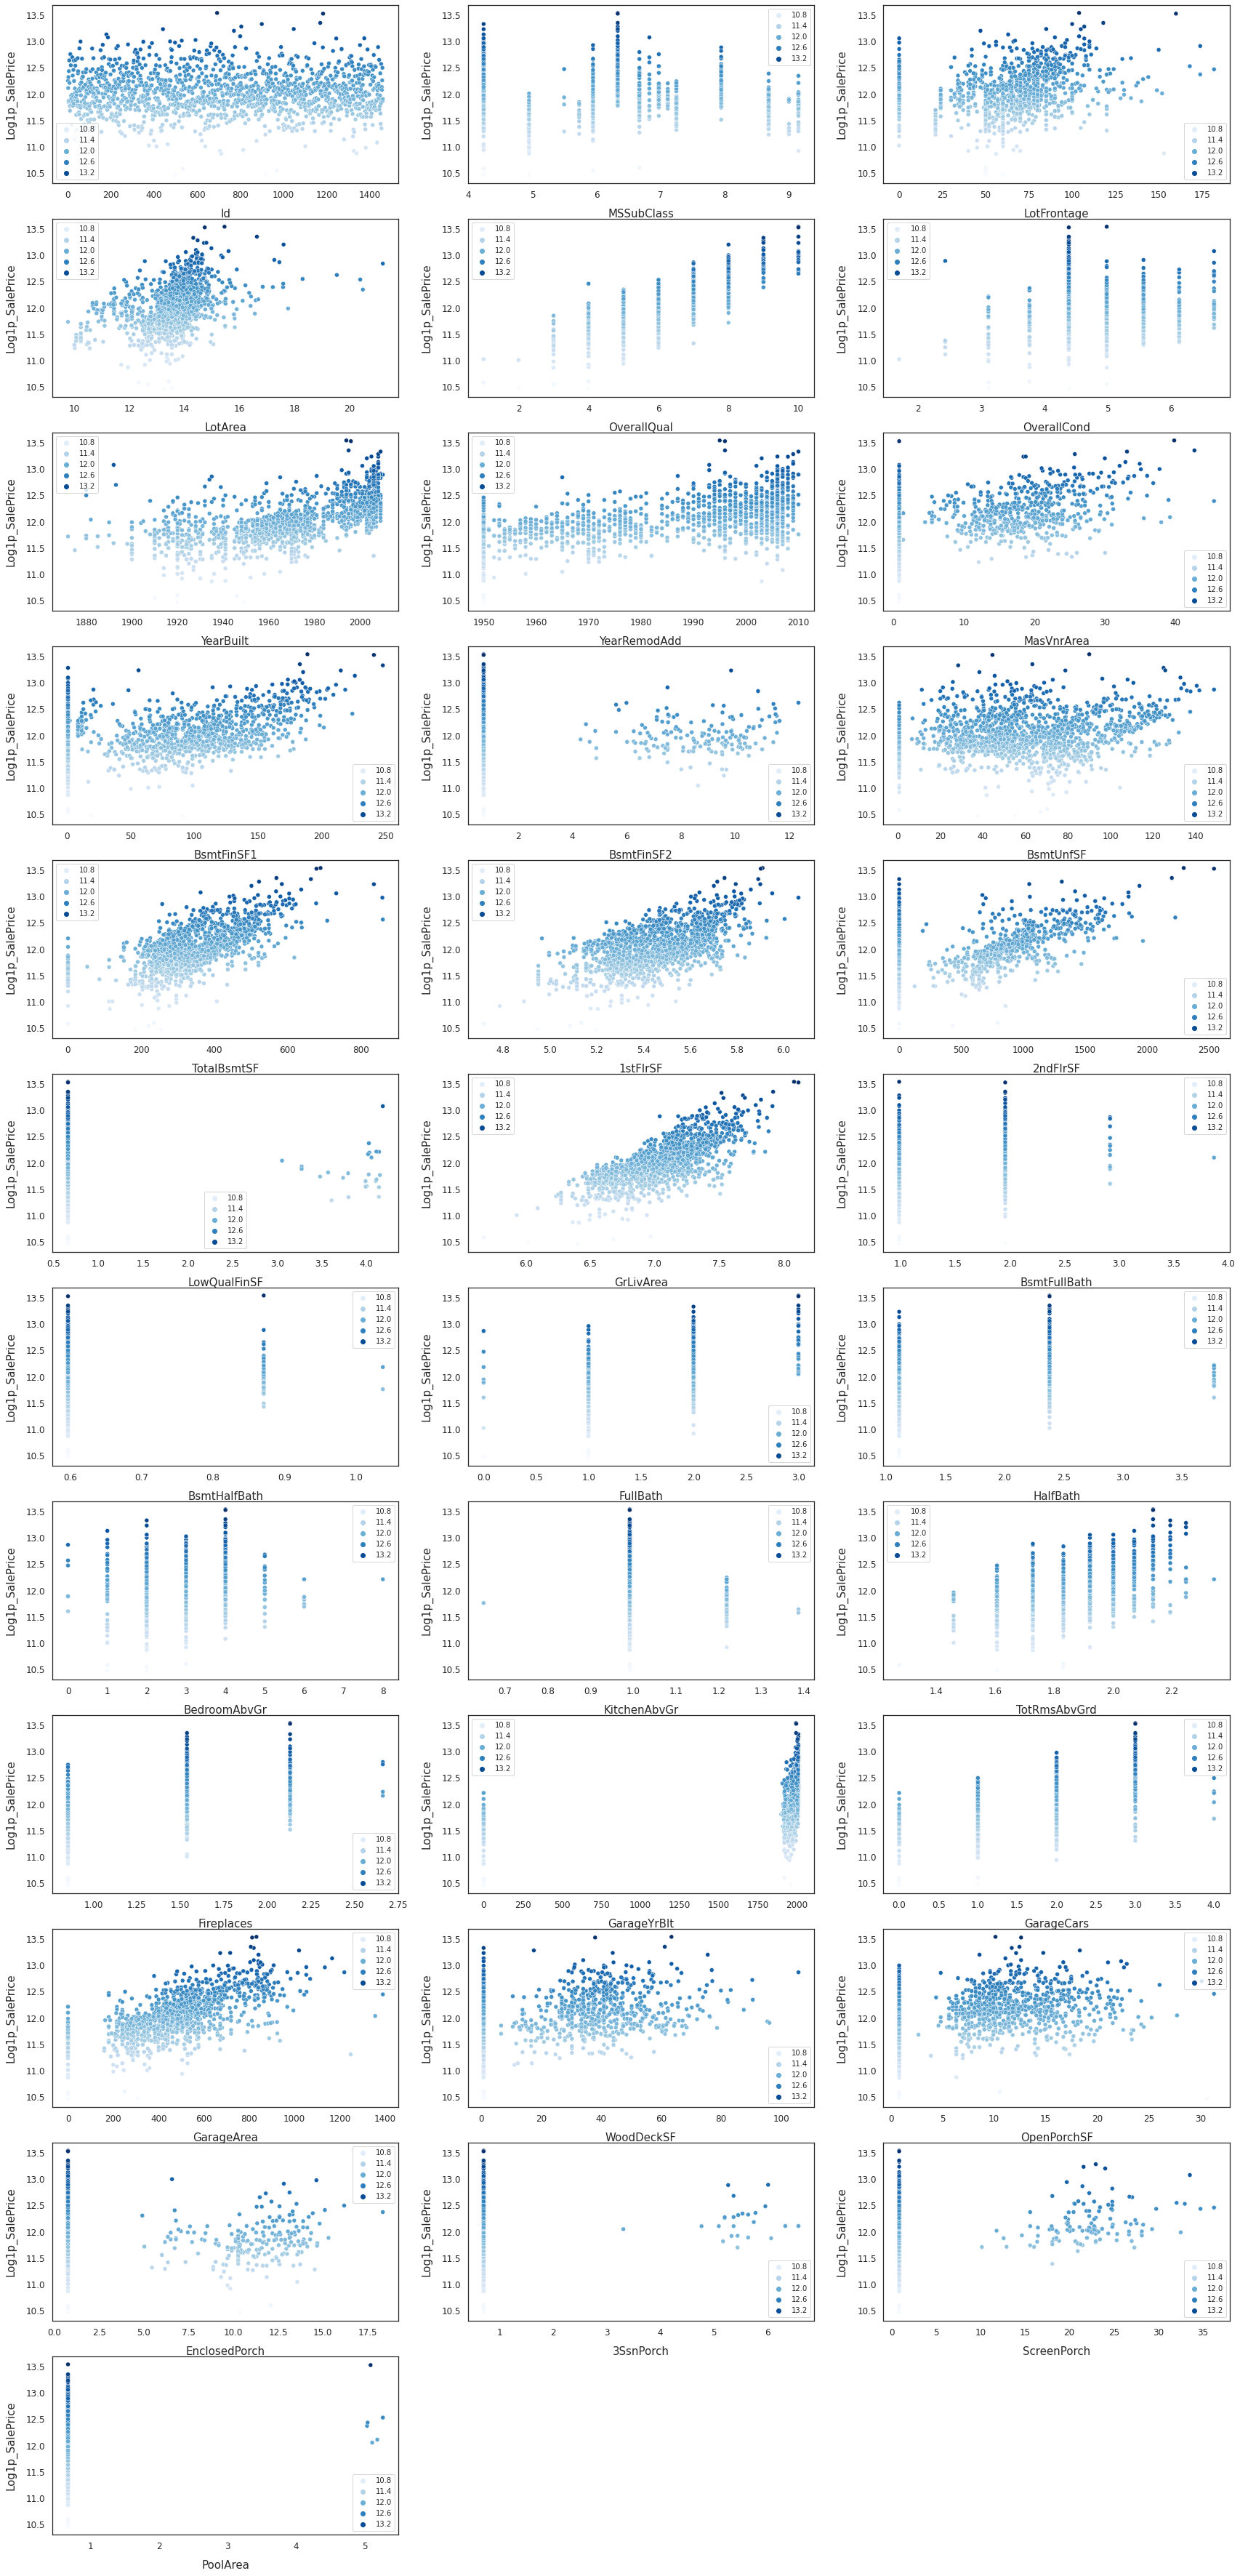

In [42]:
# Finding numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df_train.columns:
    if df_train[i].dtype in numeric_dtypes:
            numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 200))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(df_train[numeric]), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='Log1p_SalePrice', hue='Log1p_SalePrice', palette='Blues', data=df_train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('Log1p_SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

Figure 7.1: scatter plots of continuous variables versus Log1p(sale price)

Figure 7.1 Junk Model with only one variable OverallQual

In [44]:
# junk model with OverallQual only
from google.colab import files
saleprice_overallqual = df_train.groupby(['OverallQual'])['SalePrice'].mean()
print(saleprice_overallqual)
df_test_junk = pd.merge(df_test[['Id','OverallQual']],saleprice_overallqual, how='left', on='OverallQual')
df_test_junk.describe()
df_test_junk[['Id', 'SalePrice']].to_csv('OverallQual_SalePrice.csv', index=False)
#files.download('OverallQual_SalePrice.csv')

OverallQual
1     50150.000
2     51770.333
3     87473.750
4    108420.655
5    133523.348
6    161603.035
7    207608.613
8    274735.536
9    367513.023
10   471865.062
Name: SalePrice, dtype: float64


Figure 6.9 Average SalePrice by OverallQual

In [45]:
# split df_train dataset
X_train, X_test, y_train, y_test = train_test_split(df_train[df_train.columns.drop(list(df_train.filter(regex='SalePrice')))], df_train[['Log1p_SalePrice']], test_size=0.2, random_state=321)

(1165, 363)
(292, 363)
(1165, 1)
(292, 1)
Skewness: 0.123012
Kurtosis: 0.806486


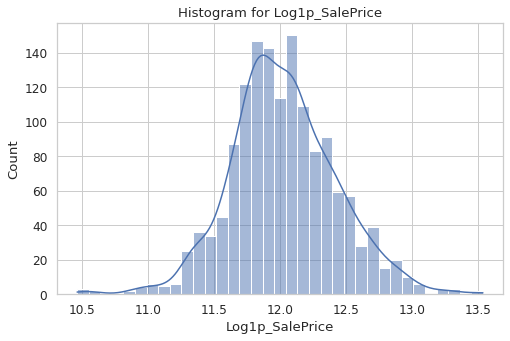

In [46]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train.head()

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(df_train['Log1p_SalePrice'],kde=True)
plt.title("Histogram for Log1p_SalePrice")
# Skew and kurt
print("Skewness: %f" % df_train['Log1p_SalePrice'].skew())
print("Kurtosis: %f" % df_train['Log1p_SalePrice'].kurt())

Figure 6.3: Histogram of Log1p_SalePrice

In [47]:
# score junk model
x_train_junk = pd.merge(X_train[['Id','OverallQual']],saleprice_overallqual, how='left', on='OverallQual')
print(np.sqrt(mean_squared_error(y_train['Log1p_SalePrice'], np.log1p(x_train_junk['SalePrice'])))) #0.22977945196526697
x_test_junk =  pd.merge(X_test[['Id','OverallQual']],saleprice_overallqual, how='left', on='OverallQual')
print(np.sqrt(mean_squared_error(y_test['Log1p_SalePrice'], np.log1p(x_test_junk['SalePrice'])))) #0.21681551289920958
#print(y_train['Log1p_SalePrice'].head())

0.22977945196526697
0.21681551289920958


-0.01485588320252118
R squared: 0.6797714824298213


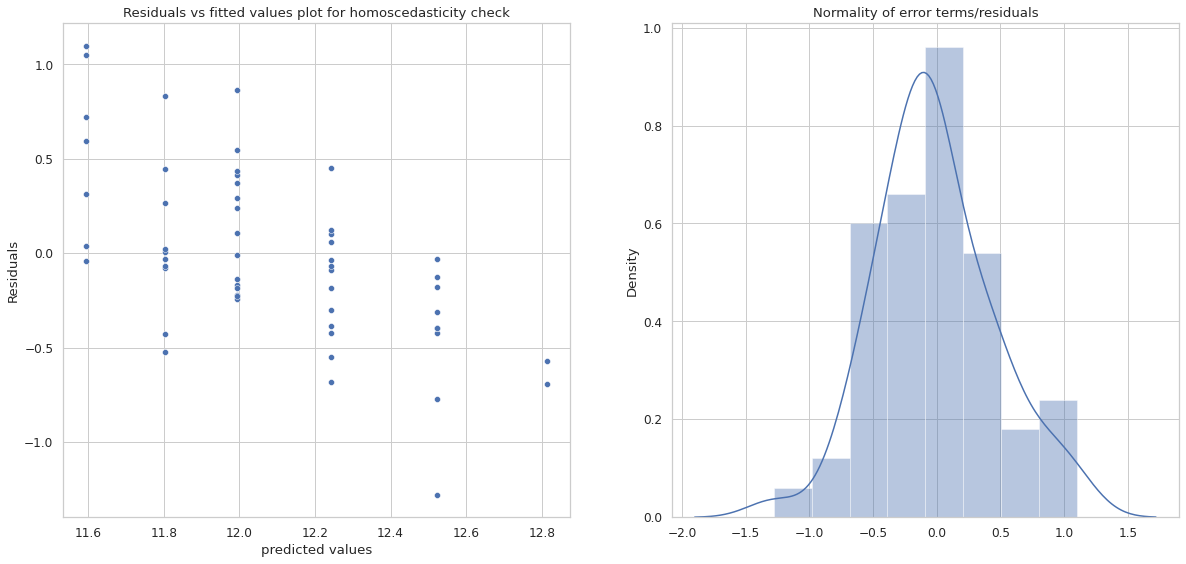

In [48]:
residuals = y_test['Log1p_SalePrice']- np.log1p(x_test_junk['SalePrice'])
mean_residuals = np.mean(residuals)
print(mean_residuals)
print("R squared: {}".format(r2_score(y_true=y_test['Log1p_SalePrice'],y_pred=np.log1p(x_test_junk['SalePrice']))))

# Detecting heteroscedasticity
fig = plt.figure(figsize = (20,20))
y_pred = np.log1p(x_test_junk['SalePrice'])
p1 = sns.scatterplot(y_pred,residuals,ax=fig.add_subplot(2,2,1))
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p1 = plt.title('Residuals vs fitted values plot for homoscedasticity check')

p2 = sns.distplot(residuals,kde=True,ax=fig.add_subplot(2,2,2))
p2 = plt.title('Normality of error terms/residuals')

Figure 7.2 Heteroscedasticity and normality of residuals

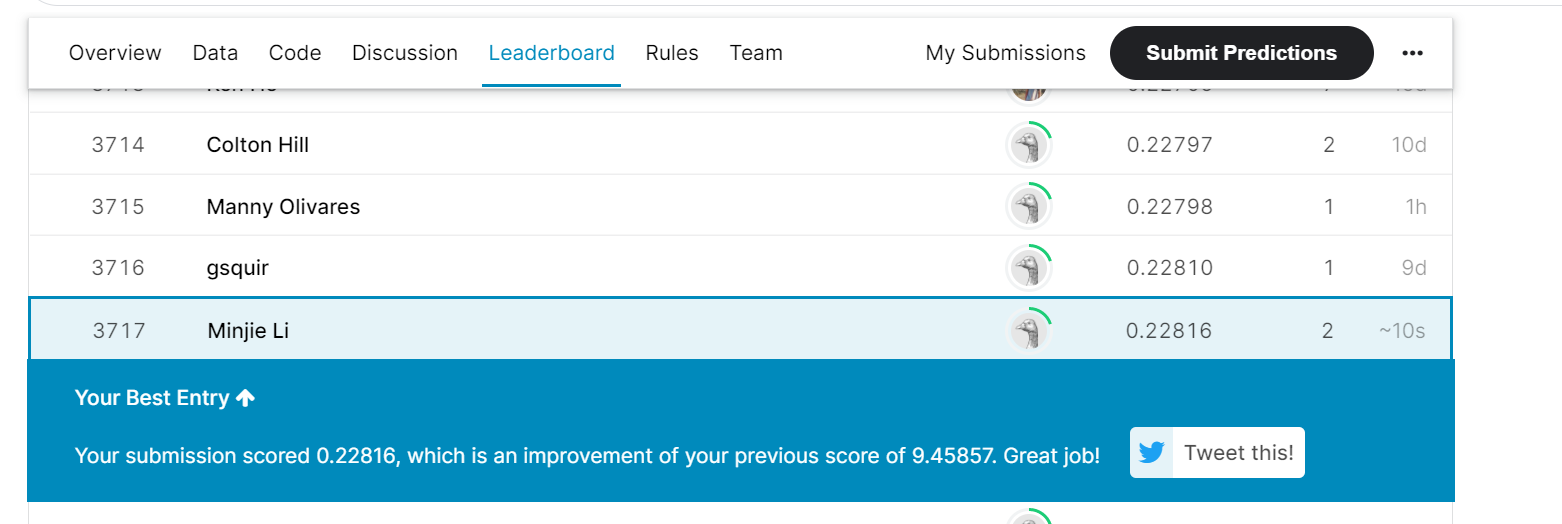

Figure 9.1: Junk model in Kaggle

Figure 6.1 split train and test on the training dataset

In [49]:
list(df_train.filter(regex='SalePrice'))+['Id']

['SalePrice',
 'Log1p_SalePrice',
 'StandardScal_SalePrice',
 'MaxMinScal_SalePrice',
 'Id']

Figure 6.2: cross validation

In [50]:
# Setup cross validation folds
kf = KFold(n_splits=10, random_state=321, shuffle=True)
# Define error metrics
def k_rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X_train, y_train):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

scores = {}

In [51]:
# LinearRegression
names=pd.DataFrame(X_train.columns)
linear = LinearRegression().fit(X_train, y_train)
score = cv_rmse(linear,X_train, y_train)
print("linear: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['linear'] = (score.mean(), score.std())


linear: 0.1950 (0.0884)


In [52]:
print(pd.DataFrame(linear.coef_.transpose()).shape)
print(names.shape)
#X_train.columns.shape
coeff_df = pd.concat([pd.DataFrame(linear.coef_.transpose(),columns=['coeff']), pd.DataFrame(X_train.columns,columns=['colname'])], axis=1)
coeff_df.head(10)

(363, 1)
(363, 1)


coeff       colname
0 -0.000            Id
1 -0.003    MSSubClass
2 -0.000   LotFrontage
3  0.143       LotArea
4  0.022   OverallQual
5  0.039   OverallCond
6  0.002     YearBuilt
7 15.324  YearRemodAdd
8  0.004    MasVnrArea
9 -0.001    BsmtFinSF1

In [53]:
## creating function to get model statistics
def get_stats():
    results = sm.OLS(y_train, X_train).fit()
    print(results.summary())
get_stats()

                            OLS Regression Results                            
Dep. Variable:        Log1p_SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     65.97
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:37:15   Log-Likelihood:                 1232.8
No. Observations:                1165   AIC:                            -1880.
Df Residuals:                     872   BIC:                            -396.9
Df Model:                         292                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Id                    -4.075e-

In [54]:
# Make predictions using the testing set
x_test_linear = pd.DataFrame()
print(pd.DataFrame(linear.predict(X_test),columns=['Log1p_SalePrice']).head())
x_test_linear = pd.DataFrame(linear.predict(X_test),columns=['Log1p_SalePrice'])
print(np.sqrt(mean_squared_error(y_test, x_test_linear['Log1p_SalePrice']))) #0.2206744703562279

   Log1p_SalePrice
0           11.753
1           11.561
2           11.770
3           11.898
4           12.097
0.22000034882470196


In [55]:
#use linear regression as the model
lr = LinearRegression()
rfe_mod =  RFECV(lr, step=1, cv=10) 
linear2=rfe_mod.fit(X_train, y_train) #to fit

In [56]:
# Make predictions using the testing set
x_test_linear2 = pd.DataFrame()
linear_test2 = linear2.predict(X_test)
x_test_linear2['Log1p_SalePrice'] = linear_test2
print(np.sqrt(mean_squared_error(y_test, x_test_linear2['Log1p_SalePrice']))) #0.18839622722363722

# check out which features were selected
rfe_mod.support_ 
var_important = pd.DataFrame(rfe_mod.support_,index=X_train.columns,columns=['Rank'])
print(var_important[var_important['Rank']==True])


0.18839622722363722
                      Rank
1stFlrSF              True
GrLivArea             True
BsmtFullBath          True
BsmtHalfBath          True
FullBath              True
HalfBath              True
KitchenAbvGr          True
TotRmsAbvGrd          True
GarageCars            True
PoolArea              True
MiscVal               True
TotalSF               True
Total_Bathrooms       True
LotArea_log           True
1stFlrSF_log          True
GrLivArea_log         True
BsmtHalfBath_log      True
KitchenAbvGr_log      True
TotRmsAbvGrd_log      True
PoolArea_log          True
MiscVal_log           True
YearRemodAdd_log      True
TotalSF_log           True
1stFlrSF_log_sq       True
GrLivArea_log_sq      True
GarageCars_log_sq     True
TotalSF_log_sq        True
MSZoning_C (all)      True
LandSlope_Sev         True
Neighborhood_Crawfor  True
Neighborhood_StoneBr  True
Condition1_RRAe       True
Condition2_RRAe       True
Condition2_RRAn       True
RoofMatl_Membran      True
RoofMatl

In [57]:
var_imp = var_important[var_important['Rank']==True].index.tolist()
print(var_imp)

['1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'PoolArea', 'MiscVal', 'TotalSF', 'Total_Bathrooms', 'LotArea_log', '1stFlrSF_log', 'GrLivArea_log', 'BsmtHalfBath_log', 'KitchenAbvGr_log', 'TotRmsAbvGrd_log', 'PoolArea_log', 'MiscVal_log', 'YearRemodAdd_log', 'TotalSF_log', '1stFlrSF_log_sq', 'GrLivArea_log_sq', 'GarageCars_log_sq', 'TotalSF_log_sq', 'MSZoning_C (all)', 'LandSlope_Sev', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'Condition1_RRAe', 'Condition2_RRAe', 'Condition2_RRAn', 'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_BrkComm', 'Heating_Grav', 'KitchenQual_Ex', 'Functional_Sev', 'Functional_Typ', 'GarageType_2Types', 'GarageQual_Ex', 'GarageCond_Fa', 'PoolQC_Ex', 'PoolQC_Gd', 'PoolQC__NA_']


In [58]:
linear2 = LinearRegression().fit(X_train[var_imp], y_train)
score = cv_rmse(linear,X_train[var_imp], y_train)
print("linear: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['linear'] = (score.mean(), score.std())

linear: 0.1560 (0.0202)


In [59]:
## creating function to get model statistics
def get_stats():
    results = sm.OLS(y_train, X_train[var_imp]).fit()
    print(results.summary())
get_stats()

                            OLS Regression Results                            
Dep. Variable:        Log1p_SalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     208.7
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:39:50   Log-Likelihood:                 708.76
No. Observations:                1165   AIC:                            -1326.
Df Residuals:                    1119   BIC:                            -1093.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
1stFlrSF                 6.8608 

In [60]:
list(X_train.columns)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'TotalSF',
 'TotalPorchSF',
 'HouseAge',
 'QualityIndex',
 'Total_Bathrooms',
 'Has_Fireplaces',
 'Has_Bsmt',
 'Has_Garage',
 'Has_Pool',
 'Has_2ndStory',
 'LotFrontage_log',
 'LotArea_log',
 'MasVnrArea_log',
 'BsmtFinSF1_log',
 'BsmtFinSF2_log',
 'BsmtUnfSF_log',
 'TotalBsmtSF_log',
 '1stFlrSF_log',
 '2ndFlrSF_log',
 'LowQualFinSF_log',
 'GrLivArea_log',
 'BsmtFullBath_log',
 'BsmtHalfBath_log',
 'FullBath_log',
 'HalfBath_log',
 'BedroomAbvGr_log',


Figure 7.3: Handpicked Linear Model

linear: 0.1297 (0.0083)
0.11485359543660614


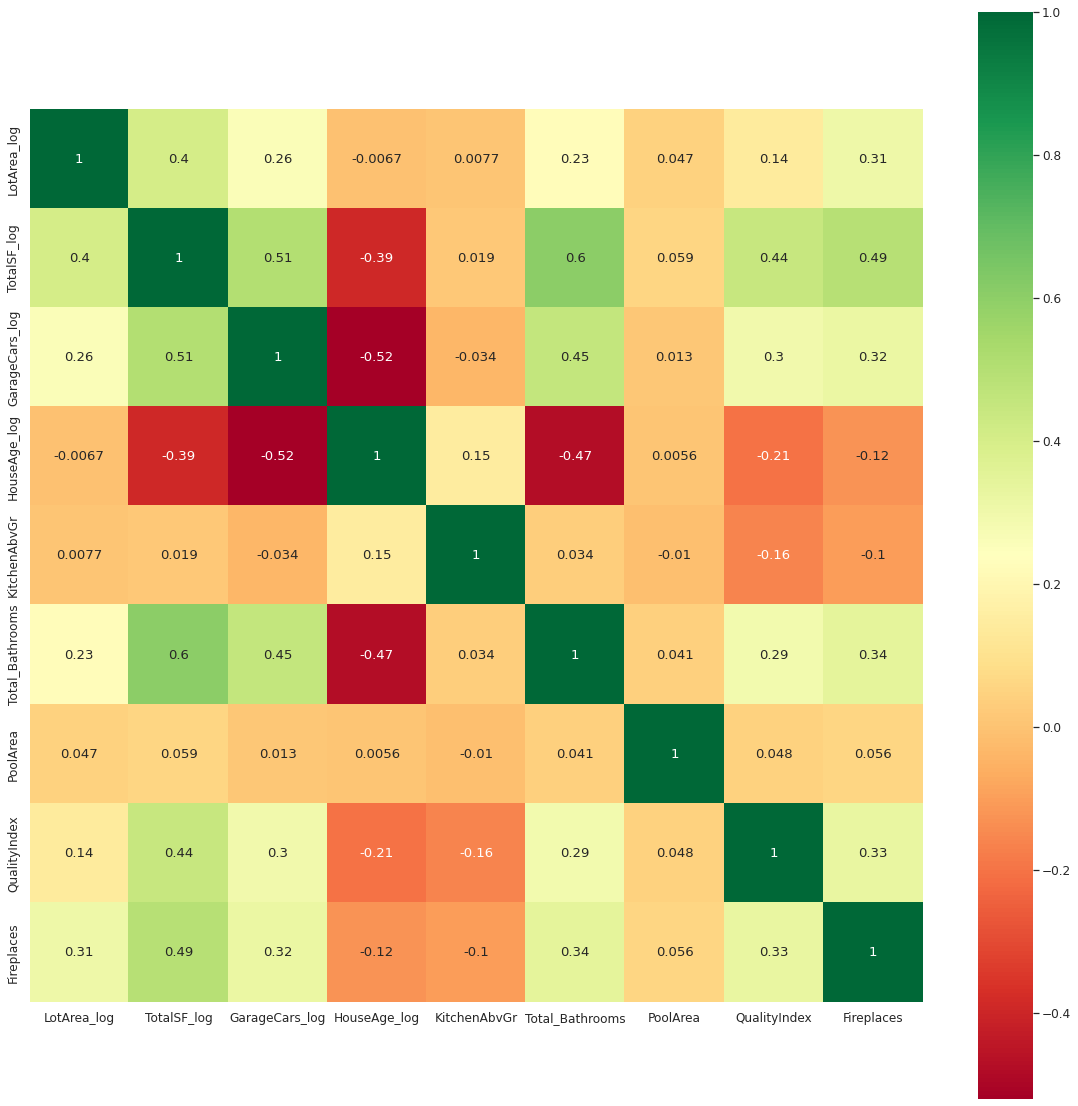

In [61]:
select_vars0 = ['TotRmsAbvGrd','TotalSF','GrLivArea','GarageCars']
select_vars1 = ['LotArea_log','TotalSF_log','GarageCars_log','HouseAge_log']
select_vars2 = ['TotalSF_log_sq','HouseAge_log_sq']
oth_var = ['KitchenAbvGr','Total_Bathrooms','PoolArea', 'QualityIndex','Fireplaces']
oth_ind = ['Has_Bsmt', 'Has_Garage', 'Has_Pool', 'Has_2ndStory',
          'Neighborhood_BrkSide','Neighborhood_Crawfor',  'Neighborhood_NoRidge',  'Neighborhood_NridgHt','Neighborhood_StoneBr',
           'Id']

features = select_vars1+select_vars2+oth_var+oth_ind
# LinearRegression

X_train0 = X_train[features]

plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(X_train[select_vars1+oth_var].corr(), annot=True,cmap='RdYlGn',square=True) 

linear3 = LinearRegression().fit(X_train0, y_train)
score = cv_rmse(linear,X_train0, y_train)
print("linear: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['linear'] = (score.mean(), score.std())
# Make predictions using the testing set
x_test_linear = pd.DataFrame(linear3.predict(X_test[features]),columns=['Log1p_SalePrice'])
print(np.sqrt(mean_squared_error(y_test, x_test_linear['Log1p_SalePrice']))) #0.11475766913083842

Figure 7.4: Multicollinearity

In [62]:
## creating function to get model statistics
def get_stats():
    results = sm.OLS(y_train, X_train0).fit()
    print(results.summary())
get_stats()

                            OLS Regression Results                            
Dep. Variable:        Log1p_SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     618.0
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:39:51   Log-Likelihood:                 754.57
No. Observations:                1165   AIC:                            -1473.
Df Residuals:                    1147   BIC:                            -1382.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
LotArea_log              0.6646 

-0.019511906803234558
R squared: 0.9101395703738636


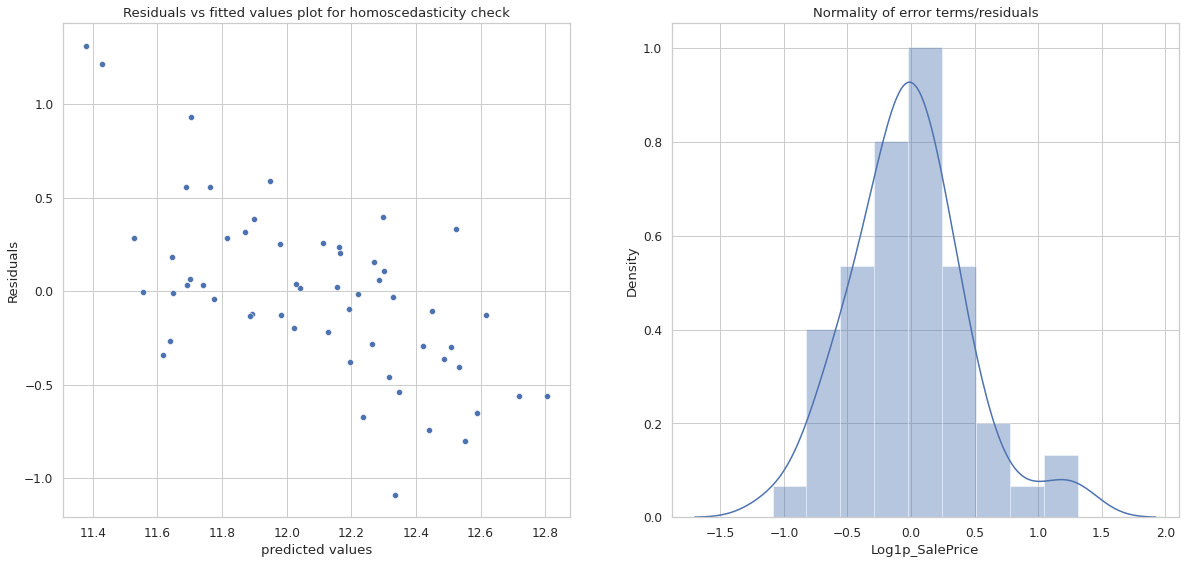

In [63]:
y_pred = x_test_linear['Log1p_SalePrice']
residuals = y_test['Log1p_SalePrice']- y_pred
mean_residuals = np.mean(residuals)
print(mean_residuals)
print("R squared: {}".format(r2_score(y_true=y_test['Log1p_SalePrice'],y_pred=y_pred)))

# Detecting heteroscedasticity
fig = plt.figure(figsize = (20,20))

p1 = sns.scatterplot(y_pred,residuals,ax=fig.add_subplot(2,2,1))
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p1 = plt.title('Residuals vs fitted values plot for homoscedasticity check')

p2 = sns.distplot(residuals,kde=True,ax=fig.add_subplot(2,2,2))
p2 = plt.title('Normality of error terms/residuals')

In [64]:
df_test_linear = pd.DataFrame()
print(df_test.Id.head())

df_test_linear = pd.DataFrame(linear3.predict(df_test[features]),columns=['Log1p_SalePrice'])
print(df_test_linear.head())
df_test_linear['SalePrice'] = np.expm1(df_test_linear['Log1p_SalePrice'])
df_test_linear['Id'] = df_test['Id'].values
df_test_linear[['Id', 'SalePrice']].to_csv('LinearRegression_SalePrice.csv', index=False)
print(df_test_linear.head())
#files.download('LinearRegression_SalePrice.csv') #0.14259

1460    1461
1461    1462
1462    1463
1463    1464
1464    1465
Name: Id, dtype: int64
   Log1p_SalePrice
0           11.628
1           11.915
2           12.087
3           12.178
4           12.238
   Log1p_SalePrice  SalePrice    Id
0           11.628 112243.255  1461
1           11.915 149536.754  1462
2           12.087 177470.955  1463
3           12.178 194412.206  1464
4           12.238 206512.954  1465


In [65]:
print(df_test_linear['SalePrice'].describe())
print(df_test_junk['SalePrice'].describe())

count     1459.000
mean    177235.729
std      75692.316
min      55795.163
25%     124108.328
50%     157447.408
75%     210526.526
max     783028.818
Name: SalePrice, dtype: float64
count     1459.000
mean    181584.037
std      69823.290
min      50150.000
25%     133523.348
50%     161603.035
75%     207608.613
max     471865.062
Name: SalePrice, dtype: float64


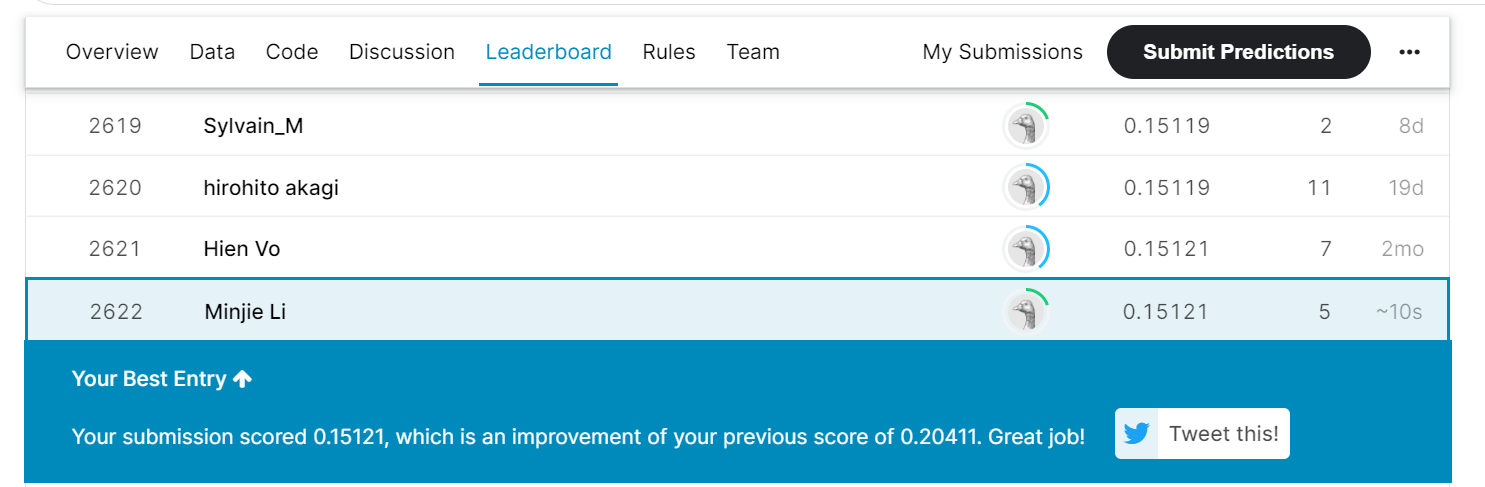

Figure 9.2: Handpicked Linear Model in Kaggle

Principal Component Analysis

In [66]:
# Standardizing the features
npca = 50
X_trainPCA = StandardScaler().fit_transform(X_train)
pca = PCA(n_components=npca)
pca_train = pca.fit_transform(X_trainPCA)
pca_trainDF = pd.DataFrame(data = pca_train, columns = ["col"+str(i) for i in range(1, npca+1)])

X_testPCA = StandardScaler().fit_transform(X_test)
pca_test = pca.transform(X_testPCA)
pca_testDF = pd.DataFrame(data = pca_test, columns = ["col"+str(i) for i in range(1, npca+1)])

pca.explained_variance_ratio_

# LinearRegression
names=pd.DataFrame(X_train.columns)
linearPCA = LinearRegression().fit(pca_trainDF, y_train)
score = cv_rmse(linearPCA,pca_trainDF, y_train)
print("linear: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['linearPCA'] = (score.mean(), score.std())
print(pca.explained_variance_ratio_)

print(pca_trainDF.head())
print(pca_testDF.head())

linear: 0.1255 (0.0103)
[0.08835163 0.03419551 0.03257189 0.0274681  0.02401261 0.02154691
 0.01591434 0.01524315 0.01386538 0.01322695 0.01266914 0.01230974
 0.01153875 0.01138356 0.01044695 0.00988861 0.00962357 0.00918755
 0.00903131 0.00890427 0.00873903 0.00838954 0.00806001 0.00784575
 0.00774812 0.00765698 0.00748594 0.00741839 0.00718533 0.00700956
 0.00688341 0.00677867 0.00659874 0.00651504 0.00638706 0.00628656
 0.00620162 0.0059897  0.00592179 0.00583144 0.00575765 0.00567489
 0.00562064 0.00558017 0.00548771 0.0053867  0.00530686 0.00514289
 0.00502012 0.00498828]
    col1   col2   col3   col4   col5  ...  col46  col47  col48  col49  col50
0 -4.140  1.302  7.049 -1.774  0.183  ...  0.392  0.799 -0.151 -0.290 -0.592
1  8.217  3.486 -1.083 -1.849 -0.532  ... -1.012 -0.695 -2.806  1.474 -0.102
2  4.812 -1.324  0.524 -2.359 -1.240  ...  0.872  0.098 -0.722  0.096  0.064
3 -5.172 -1.638  4.994 -1.375  0.890  ... -0.319 -1.028  0.969  1.290  0.858
4  7.226  2.302 -0.831 -1.620 -

In [67]:
# Make predictions using the testing set
x_test_linear = pd.DataFrame()
print(pd.DataFrame(linearPCA.predict(pca_testDF),columns=['Log1p_SalePrice']).head())
x_test_linear = pd.DataFrame(linearPCA.predict(pca_testDF),columns=['Log1p_SalePrice'])
print(np.sqrt(mean_squared_error(y_test, x_test_linear['Log1p_SalePrice']))) #0.1107754992636765

   Log1p_SalePrice
0           11.801
1           11.556
2           11.564
3           11.824
4           12.177
0.11198100538529619


In [68]:
df_test_linearPCA = pd.DataFrame()
print(df_test.Id.head())

df_testPCA = StandardScaler().fit_transform(df_test)
pca_df_test = pca.transform(df_testPCA)
pca_df_testDF = pd.DataFrame(data = pca_df_test, columns = ["col"+str(i) for i in range(1, npca+1)])

df_test_linearPCA = pd.DataFrame(linearPCA.predict(pca_df_testDF),columns=['Log1p_SalePrice'])
print(df_test_linearPCA.head())
df_test_linearPCA['SalePrice'] = np.expm1(df_test_linearPCA['Log1p_SalePrice'])
df_test_linearPCA['Id'] = df_test['Id'].values
df_test_linearPCA[['Id', 'SalePrice']].to_csv('LinearRegressionPCA_SalePrice.csv', index=False)
print(df_test_linearPCA.head())
#files.download('LinearRegressionPCA_SalePrice.csv') #.13759

1460    1461
1461    1462
1462    1463
1463    1464
1464    1465
Name: Id, dtype: int64
   Log1p_SalePrice
0           11.626
1           12.047
2           12.134
3           12.272
4           12.188
   Log1p_SalePrice  SalePrice    Id
0           11.626 111994.394  1461
1           12.047 170633.255  1462
2           12.134 186040.808  1463
3           12.272 213587.118  1464
4           12.188 196483.486  1465


In [69]:
print(df_test_junk['SalePrice'].describe())
print(df_test_linear['SalePrice'].describe())
print(df_test_linearPCA['SalePrice'].describe())

count     1459.000
mean    181584.037
std      69823.290
min      50150.000
25%     133523.348
50%     161603.035
75%     207608.613
max     471865.062
Name: SalePrice, dtype: float64
count     1459.000
mean    177235.729
std      75692.316
min      55795.163
25%     124108.328
50%     157447.408
75%     210526.526
max     783028.818
Name: SalePrice, dtype: float64
count     1459.000
mean    180082.548
std      77896.748
min      48679.514
25%     126645.363
50%     159273.332
75%     212119.633
max     761071.329
Name: SalePrice, dtype: float64


Figure 8.1 Support Vector Regressor, KRR, Ridge and Lasso

In [70]:
# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# KRR
krr = make_pipeline(RobustScaler(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5))

# Ridge Regressor
ridge_alphas = [9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Lasso Regressor
lasso_alphas = arange (0.0001, 0.002, 0.0001)
lasso = make_pipeline(RobustScaler(), LassoCV(alphas =lasso_alphas, cv=kf))

In [71]:
score = cv_rmse(svr,X_train, y_train)
print("svr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

svr: 0.1135 (0.0073)


In [72]:
svr =svr.fit(X_train, y_train)
x_test_svr = pd.DataFrame()
svr_test = svr.predict(X_test)
x_test_svr['Log1p_SalePrice'] = svr_test
print(np.sqrt(mean_squared_error(y_test, x_test_svr['Log1p_SalePrice'])))

0.10101178077230695


-0.037538587136317095
R squared: 0.9304938304523374


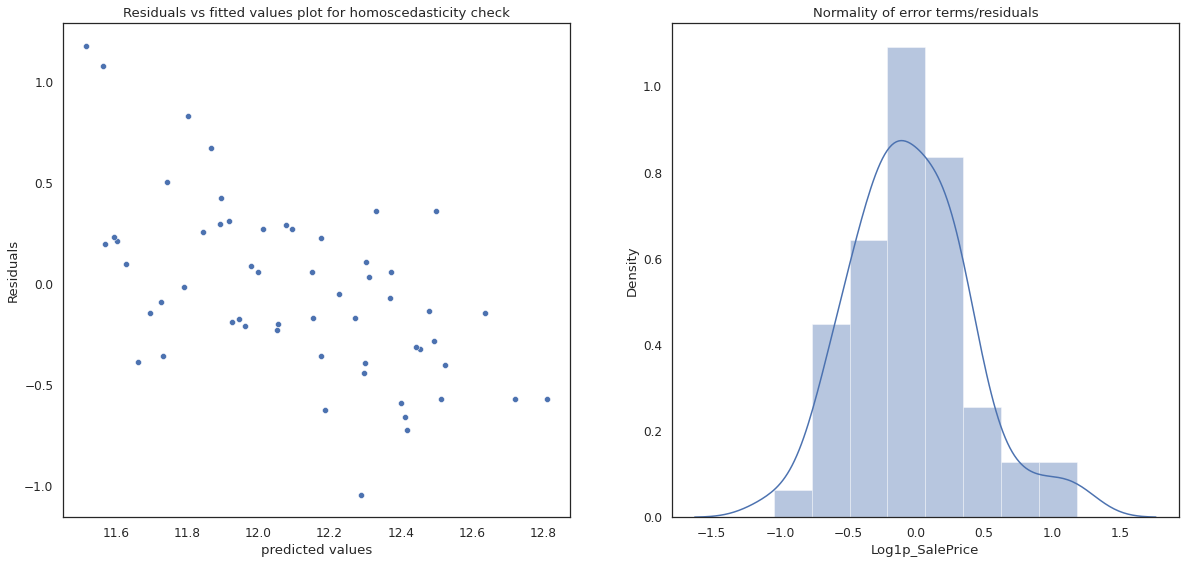

In [179]:
residuals = y_test['Log1p_SalePrice']- x_test_svr['Log1p_SalePrice']
mean_residuals = np.mean(residuals)
print(mean_residuals)
print("R squared: {}".format(r2_score(y_true=y_test['Log1p_SalePrice'],y_pred=x_test_svr['Log1p_SalePrice'])))

# Detecting heteroscedasticity
fig = plt.figure(figsize = (20,20))
y_pred = x_test_svr['Log1p_SalePrice']
p1 = sns.scatterplot(y_pred,residuals,ax=fig.add_subplot(2,2,1))
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p1 = plt.title('Residuals vs fitted values plot for homoscedasticity check')

p2 = sns.distplot(residuals,kde=True,ax=fig.add_subplot(2,2,2))
p2 = plt.title('Normality of error terms/residuals')

In [73]:
df_test.head()

Id  MSSubClass  ...  SaleCondition_Normal  SaleCondition_Partial
1460  1461       4.237  ...                     1                      0
1461  1462       4.237  ...                     1                      0
1462  1463       6.329  ...                     1                      0
1463  1464       6.329  ...                     1                      0
1464  1465       7.942  ...                     1                      0

[5 rows x 363 columns]

In [74]:
df_test_svr = df_test[df_test.columns.drop(list(df_test.filter(regex='SalePrice')))]
df_test_svr['Log1p_SalePrice'] = svr.predict(df_test_svr)
df_test_svr['SalePrice'] = np.expm1(df_test_svr['Log1p_SalePrice'])
df_test_svr[['Id', 'SalePrice']].to_csv('SVR_SalePrice.csv', index=False)
#files.download('SVR_SalePrice.csv') #0.12749

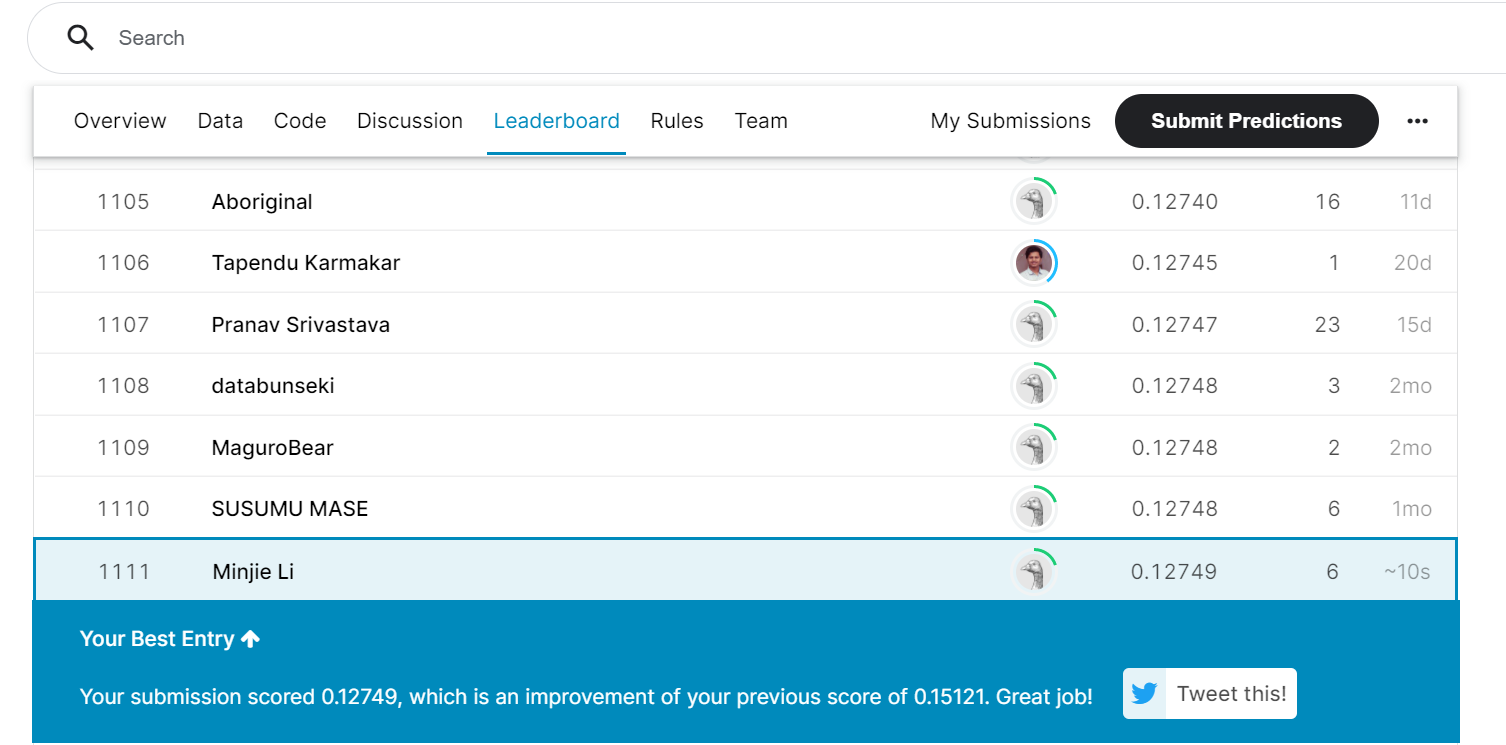

Figure 9.3: SVR in Kaggle

In [76]:
score = cv_rmse(krr,X_train, y_train)
print("krr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['krr'] = (score.mean(), score.std())

krr: 0.1173 (0.0064)


In [77]:
krr =krr.fit(X_train, y_train)
krr_test = krr.predict(X_test)
x_test_krr = pd.DataFrame(krr_test, columns=['Log1p_SalePrice'])
print(np.sqrt(mean_squared_error(y_test, x_test_krr['Log1p_SalePrice'])))

0.1026971253108915


Figure 8.2: Ridge Model

In [78]:
score = cv_rmse(ridge,X_train, y_train)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge: 0.1149 (0.0071)


In [79]:
ridge =ridge.fit(X_train, y_train)
ridge_test = ridge.predict(X_test)
x_test_ridge = pd.DataFrame(ridge_test, columns=['Log1p_SalePrice'])
print(np.sqrt(mean_squared_error(y_test, x_test_ridge['Log1p_SalePrice'])))

0.1012346361357768


-0.02266520877681812
R squared: 0.9301867987452228


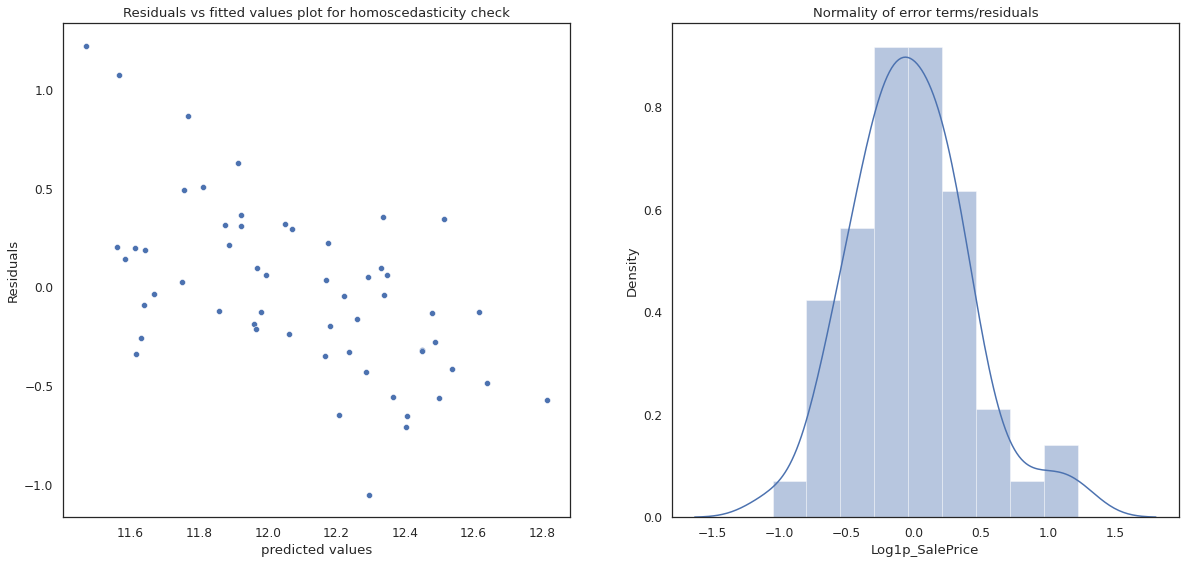

In [180]:
residuals = y_test['Log1p_SalePrice']- x_test_ridge['Log1p_SalePrice']
mean_residuals = np.mean(residuals)
print(mean_residuals)
print("R squared: {}".format(r2_score(y_true=y_test['Log1p_SalePrice'],y_pred=x_test_ridge['Log1p_SalePrice'])))

# Detecting heteroscedasticity
fig = plt.figure(figsize = (20,20))
y_pred = x_test_ridge['Log1p_SalePrice']
p1 = sns.scatterplot(y_pred,residuals,ax=fig.add_subplot(2,2,1))
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p1 = plt.title('Residuals vs fitted values plot for homoscedasticity check')

p2 = sns.distplot(residuals,kde=True,ax=fig.add_subplot(2,2,2))
p2 = plt.title('Normality of error terms/residuals')

In [156]:
df_test_ridge = df_test[df_test.columns.drop(list(df_test.filter(regex='SalePrice')))]
df_test_ridge['Log1p_SalePrice'] = ridge.predict(df_test_ridge)
df_test_ridge['SalePrice'] = np.expm1(df_test_ridge['Log1p_SalePrice'])
df_test_ridge[['Id', 'SalePrice']].to_csv('Ridge_SalePrice.csv', index=False)
#files.download('Ridge_SalePrice.csv') #0.12431

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

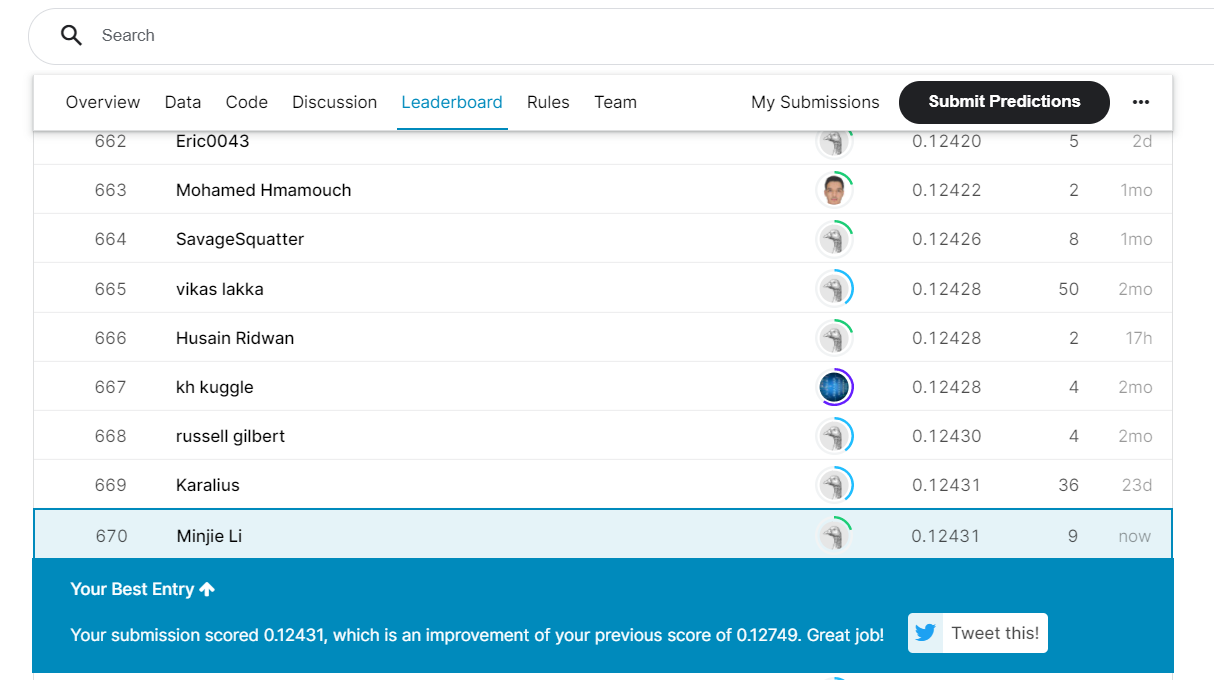

Figure 9.4: Ridge Model in Kaggle

Figure 8.3: Lasso Model

In [80]:
score = cv_rmse(lasso,X_train, y_train)
print("lasso: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lasso'] = (score.mean(), score.std())

lasso: 0.1130 (0.0073)


In [81]:
lasso =lasso.fit(X_train, y_train)
lasso_test = lasso.predict(X_test)
x_test_lasso = pd.DataFrame(lasso_test, columns=['Log1p_SalePrice'])
print(np.sqrt(mean_squared_error(y_test, x_test_lasso['Log1p_SalePrice'])))

0.10010510850991694


In [157]:
df_test_lasso = df_test[df_test.columns.drop(list(df_test.filter(regex='SalePrice')))]
df_test_lasso['Log1p_SalePrice'] = lasso.predict(df_test_lasso)
df_test_lasso['SalePrice'] = np.expm1(df_test_lasso['Log1p_SalePrice'])
df_test_lasso[['Id', 'SalePrice']].to_csv('Lasso_SalePrice.csv', index=False)
#files.download('Lasso_SalePrice.csv') #0.12749

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

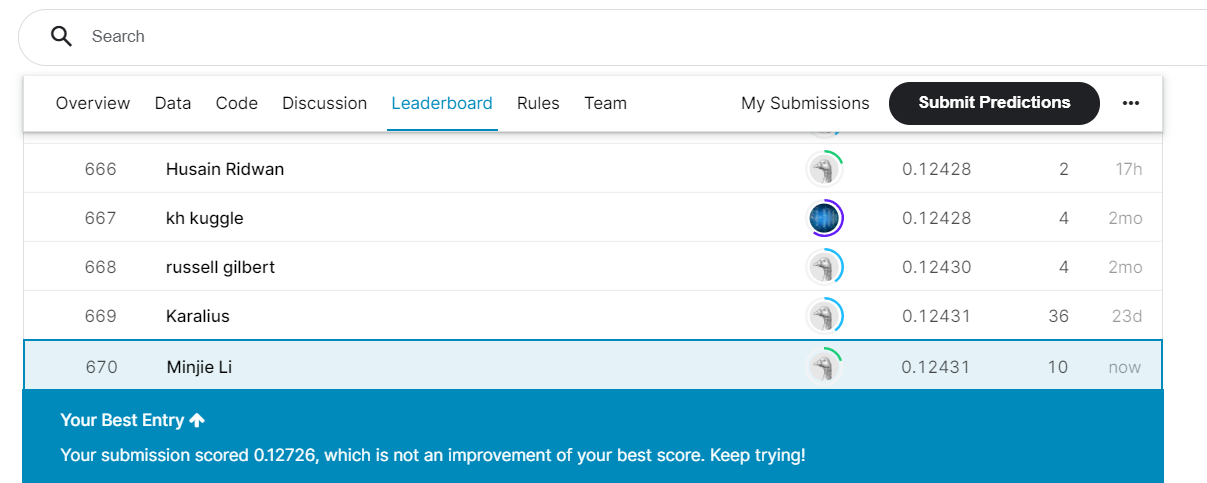

Figure 9.5: Lasso Model in Kaggle

Elastic Net Regression

In [82]:
alphas = arange (0.0001, 0.002, 0.0001)
len(alphas)

19

In [83]:
# Definning models
model_ridge = Ridge()
model_lasso = Lasso()
model_elasticNet = ElasticNet(l1_ratio=0.99)

# Tunning hyperparameter
# In this example we use alpha as our hyperparameter lambda. 

ridge_alphas = list(arange (0.0001, 0.002, 0.0001)) + [0.1, 0.3, 1, 3, 5, 10, 15]
lasso_alphas = arange (0.0001, 0.002, 0.0001)

# Evaluating models through k-fold cross-validation defined earlier
cv_ridge = [cv_rmse(Ridge(alpha = alpha),X_train, y_train).mean() 
            for alpha in ridge_alphas]

cv_lasso = [cv_rmse(Lasso(alpha = alpha),X_train, y_train).mean() 
            for alpha in lasso_alphas]

cv_elasticNet = [cv_rmse(ElasticNet(alpha = alpha),X_train, y_train).mean() 
            for alpha in lasso_alphas]

cv_ridge = pd.Series(cv_ridge, index = ridge_alphas)
cv_lasso = pd.Series(cv_lasso, index = lasso_alphas)
cv_elasticNet = pd.Series(cv_elasticNet, index = lasso_alphas)

# In this example we use ratios as our hyperparameter l1_ratio. 
ratios = arange(0, 1, 0.01)

cv_elasticNet2 = [cv_rmse(ElasticNet(l1_ratio = ratio),X_train, y_train).mean() 
            for ratio in ratios]


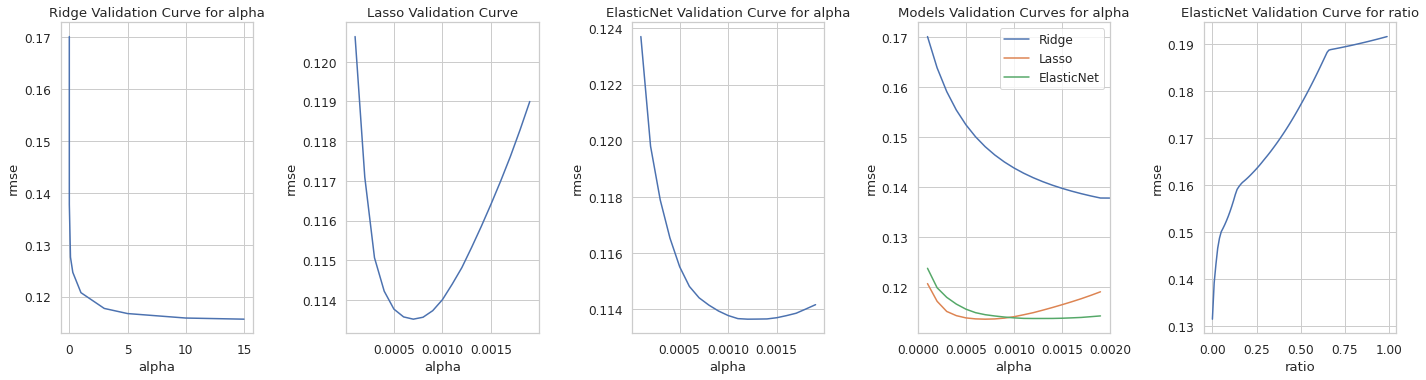

In [84]:

plt.figure(figsize=(20,10))

plt.subplot(251)
cv_ridge.plot(title = "Ridge Validation Curve for alpha")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_lasso = pd.Series(cv_lasso, index = lasso_alphas)
plt.subplot(252)
cv_lasso.plot(title = "Lasso Validation Curve")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_elasticNet = pd.Series(cv_elasticNet, index = lasso_alphas)
plt.subplot(253)
cv_elasticNet.plot(title = "ElasticNet Validation Curve for alpha")
plt.xlabel("alpha")
plt.ylabel("rmse")

plt.subplot(254)
cv_ridge.plot().set_xlim([0, 0.002])
cv_lasso.plot()
cv_elasticNet.plot()
plt.legend(labels=['Ridge','Lasso','ElasticNet'])
plt.title('Models Validation Curves for alpha')
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_elasticNet2 = pd.Series(cv_elasticNet2, index = ratios)
plt.subplot(255)
cv_elasticNet2.plot(title = "ElasticNet Validation Curve for ratio")
plt.xlabel("ratio")
plt.ylabel("rmse")

plt.tight_layout()


Figure 8.1: hyperparameter tuning for Ridge, Lasso, and Elastic Net

In [85]:
ridgeCV = RidgeCV(alphas=alphas, cv=kf)
ridgeCV.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % ridgeCV.alpha_)

alpha: 0.001900


In [86]:
lassoCV = LassoCV(alphas=alphas, cv=kf)
lassoCV.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % lassoCV.alpha_)

alpha: 0.000700


Figure 8.4: Elastic Net Regression

In [87]:
elasticNetCV = ElasticNetCV(l1_ratio=ratios, alphas=lasso_alphas, cv=kf)
elasticNetCV.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % elasticNetCV.alpha_)
print('l1_ratio_: %f' % elasticNetCV.l1_ratio_)

alpha: 0.000700
l1_ratio_: 0.990000


In [106]:
enet =ElasticNet(l1_ratio=.99, alpha=0.00070,random_state=321)
score = cv_rmse(enet,X_train, y_train)
print("ElasticNet: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['enet'] = (score.mean(), score.std())

ElasticNet: 0.1135 (0.0072)


In [ ]:
# Elastic Net Regression
#enet = make_pipeline(RobustScaler(), ElasticNetCV(l1_ratio=.99,alphas =alphas, cv=kf))
#score = cv_rmse(enet,X_train, y_train)
#print("ElasticNet: {:.4f} ({:.4f})".format(score.mean(), score.std()))
#scores['enet'] = (score.mean(), score.std())

In [107]:
enet =enet.fit(X_train, y_train)

In [108]:
enet_test = enet.predict(X_test)
x_test_enet = pd.DataFrame(enet_test, columns=['Log1p_SalePrice'])
print(np.sqrt(mean_squared_error(y_test, x_test_enet['Log1p_SalePrice'])))

0.10067882225714392


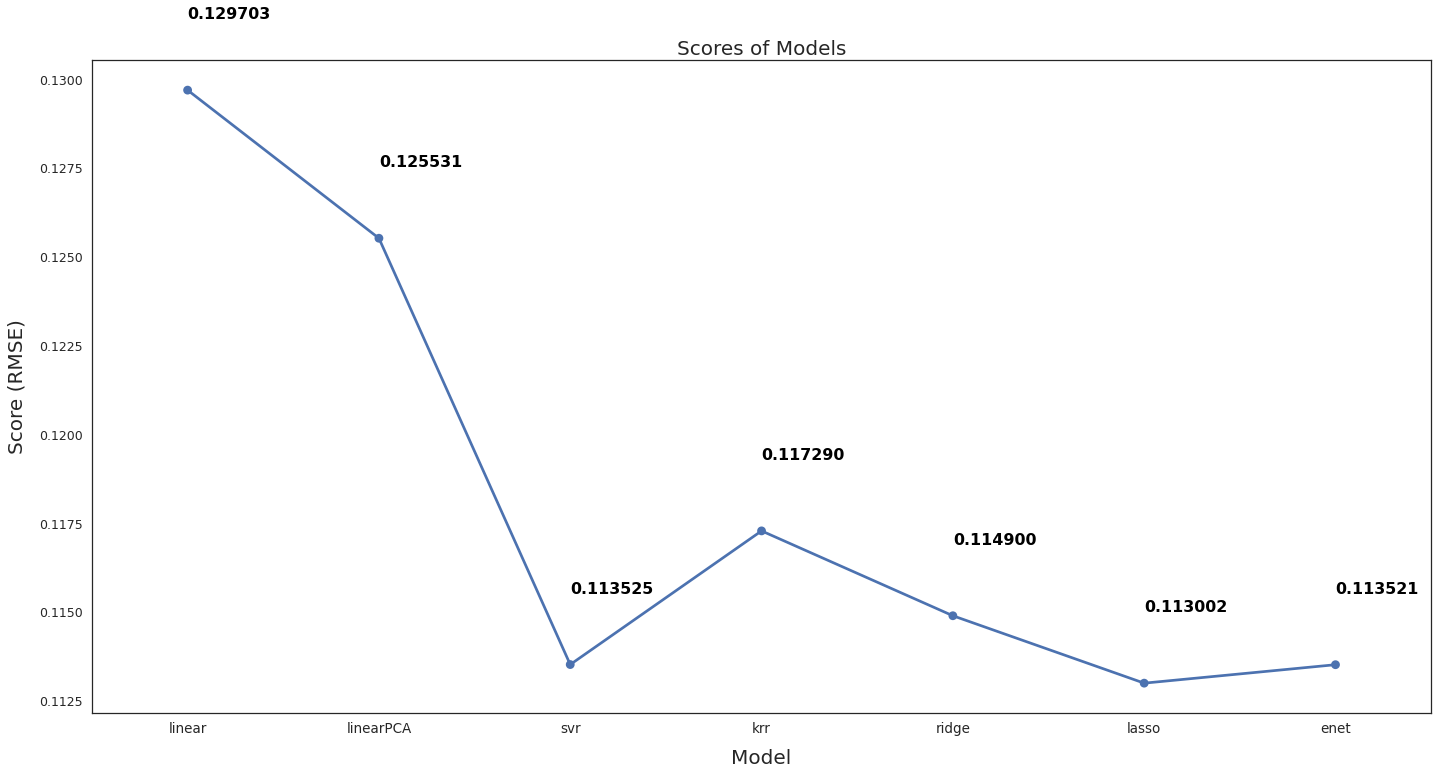

In [109]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

In [158]:
df_test_enet = df_test[df_test.columns.drop(list(df_test.filter(regex='SalePrice')))]
df_test_enet['Log1p_SalePrice'] = enet.predict(df_test_enet)
df_test_enet['SalePrice'] = np.expm1(df_test_enet['Log1p_SalePrice'])
df_test_enet[['Id', 'SalePrice']].to_csv('ENET_SalePrice.csv', index=False)
#files.download('ENET_SalePrice.csv') #0.12749

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

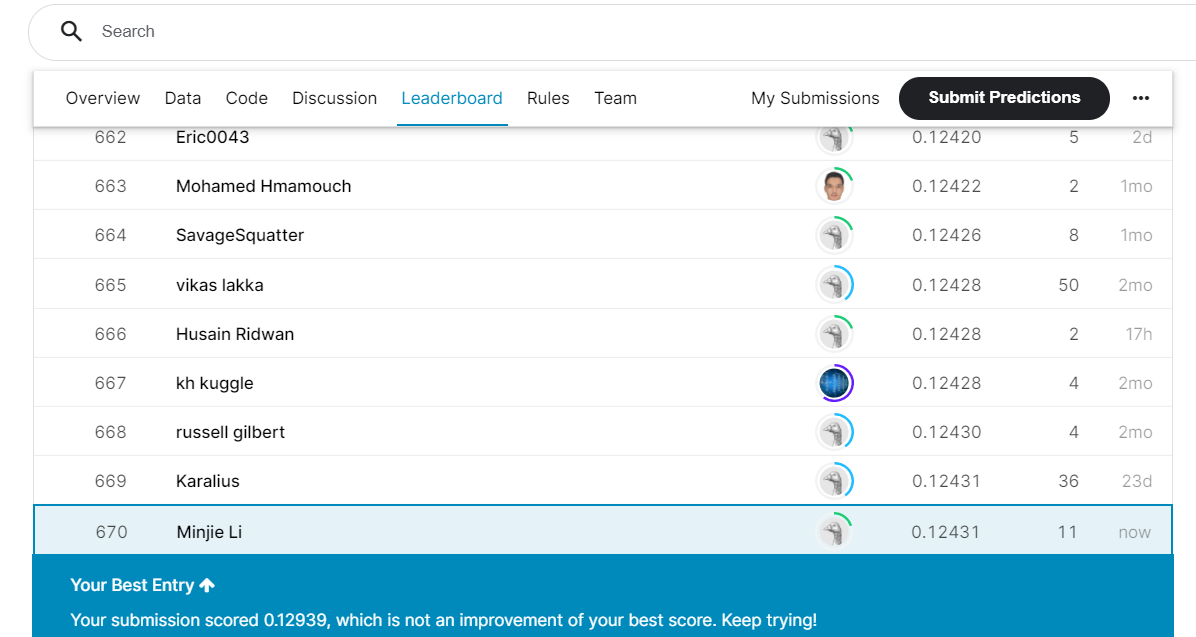

Figure 9.6: Elastic Net Model in Kaggle

In [173]:
# Fix outleir predictions
submission = df_test[df_test.columns.drop(list(df_test.filter(regex='SalePrice')))]
submission['SalePrice'] = 1/4*(df_test_svr['SalePrice'] + df_test_ridge['SalePrice']+df_test_lasso['SalePrice']+df_test_enet['SalePrice'])
q1 = submission['SalePrice'].quantile(0.0045)
q2 = submission['SalePrice'].quantile(0.99)
print(q1, q2)
print(submission.head())
print(submission[['Id', 'SalePrice']].describe())
submission[['Id', 'SalePrice']].to_csv('Blended_SalePrice.csv', index=False)
#files.download('Blended_SalePrice.csv')

55539.98957354686 441209.3054573772
        Id  MSSubClass  ...  SaleCondition_Partial  SalePrice
1460  1461       4.237  ...                      0 117116.956
1461  1462       4.237  ...                      0 159975.587
1462  1463       6.329  ...                      0 186473.635
1463  1464       6.329  ...                      0 199131.251
1464  1465       7.942  ...                      0 192625.824

[5 rows x 364 columns]
            Id  SalePrice
count 1459.000   1459.000
mean  2190.000 178512.124
std    421.321  79226.242
min   1461.000  46786.611
25%   1825.500 126381.127
50%   2190.000 157376.778
75%   2554.500 210866.448
max   2919.000 941656.668


In [174]:
print(df_test_ridge['SalePrice'].describe())

count     1459.000
mean    177679.858
std      79002.638
min      47719.606
25%     125334.824
50%     156520.270
75%     210771.470
max     888071.479
Name: SalePrice, dtype: float64


In [169]:
# Fix outleir predictions
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.71)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.18)
print(submission[['Id', 'SalePrice']].describe())

            Id   SalePrice
count 1459.000    1459.000
mean  2190.000  179406.598
std    421.321   84316.069
min   1461.000   33218.494
25%   1825.500  126381.127
50%   2190.000  157376.778
75%   2554.500  210866.448
max   2919.000 1111154.868


In [175]:
#Scale predictions
submission['SalePrice'] = submission['SalePrice']/1.005472
print(submission[['Id', 'SalePrice']].describe())
submission[['Id', 'SalePrice']].to_csv('Blended2_SalePrice.csv', index=False)
#files.download('Blended2_SalePrice.csv')

            Id  SalePrice
count 1459.000   1459.000
mean  2190.000 177540.622
std    421.321  78795.075
min   1461.000  46531.988
25%   1825.500 125693.333
50%   2190.000 156520.299
75%   2554.500 209718.867
max   2919.000 936531.965


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(df_test_junk['SalePrice'].describe())
print(df_test_linear['SalePrice'].describe())
print(df_test_linearPCA['SalePrice'].describe())
print(df_test_svr['SalePrice'].describe())
print(df_test_ridge['SalePrice'].describe())
print(df_test_lasso['SalePrice'].describe())
print(df_test_enet['SalePrice'].describe())